In [1]:
import pandas as pd

In [2]:
!pwd

/12tb_dsk3/PD_classifier/with_smug_1/New_Gene_sets


In [3]:
meta_data = pd.read_csv('../../../For_analysis/RNASequencing/IR3/metaDataIR3.csv')
meta_data

HudAlphaID QCflagIR3 Specimen Bar Code  PATNO  GENDER       DIAGNOSIS  \
0     5104-SL-0001      pass        0000373111   3174    Male              PD   
1     5104-SL-0002      pass       PP0016-0526   3201  Female         Control   
2     5104-SL-0003      pass        0003125874   3057  Female         Control   
3     5104-SL-0004      pass        0003179818   4126    Male              PD   
4     5104-SL-0005      pass        0003164601   4117  Female              PD   
...            ...       ...               ...    ...     ...             ...   
4866  5104-SL-4890      pass        0003314545  41314  Female  Genetic Cohort   
4867  5104-SL-4891      pass        0003376702  42308    Male  Genetic Cohort   
4868  5104-SL-4892      pass        0003376763  42306    Male  Genetic Cohort   
4869  5104-SL-4893      pass        0003203630   1010     Unk          HCPOOL   
4870  5104-SL-4894      pass        0003202476   1009     Unk          PDPOOL   

     CLINICAL_EVENT Specimen Bar Code.1  Quantity (ug)  Concentration (ng/ul)  \
0               V08          0000373111            1.0                 115.90   
1                BL         PP0016-0526            1.0                  80.07   
2               V06          0003125874            1.0                 219.70   
3               V04          0003179818            1.0                 100.06   
4                BL          0003164601            1.0                 124.40   
...             ...                 ...            ...                    ...   
4866            V02          0003314545            1.0                 105.10   
4867            V02          0003376702            1.0                  56.09   
4868            V02          0003376763            1.0                  59.68   
4869            Unk          0003203630            1.0                  50.00   
4870            Unk          0003202476            1.0                  50.00   

      ...  MEDIAN_3PRIME_BIAS  NUM_UNEXPLAINED_READS  PCT_RIBOSOMAL_BASES  \
0     ...            0.845235                1093161                  0.0   
1     ...            0.913436                 569224                  0.0   
2     ...            0.902573                 485102                  0.0   
3     ...            0.856690                1145227                  0.0   
4     ...            0.894656                 461631                  0.0   
...   ...                 ...                    ...                  ...   
4866  ...            0.707867                1097837                  0.0   
4867  ...            0.719713                 775420                  0.0   
4868  ...            0.736184                 794163                  0.0   
4869  ...            0.707379                 748803                  0.0   
4870  ...            0.711615                 959378                  0.0   

      PCT_INTRONIC_BASES  PCT_R2_TRANSCRIPT_STRAND_READS  PCT_MRNA_BASES  \
0                43.4564                         98.1025         50.4726   
1                52.9752                         98.1428         40.6987   
2                52.2706                         95.4321         36.0884   
3                45.9355                         98.3785         48.3407   
4                58.3984                         98.0678         35.8255   
...                  ...                             ...             ...   
4866             41.6055                         92.5357         40.2167   
4867             47.0490                         97.3024         38.8043   
4868             49.0178                         97.0378         38.4877   
4869             40.0865                         95.8621         44.4177   
4870             39.5286                         96.0109         44.1873   

      MEDIAN_5PRIME_TO_3PRIME_BIAS  PCT_R1_TRANSCRIPT_STRAND_READS  \
0                         1.191875                          1.8975   
1                         1.058616                          1.8572   
2             

In [4]:
meta_data.columns

Index(['HudAlphaID', 'QCflagIR3', 'Specimen Bar Code', 'PATNO', 'GENDER',
       'DIAGNOSIS', 'CLINICAL_EVENT', 'Specimen Bar Code.1', 'Quantity (ug)',
       'Concentration (ng/ul)', 'Concentration Flag', 'Submitted Volume (ul)',
       'Normalization Volume (30ng/ul)', 'Total Volume (ul)',
       'Input RNASeq (ng)', 'Input miRNA (ng)', '260/280 Ratio',
       '260/230 Ratio', 'RIN Value', 'BOX', 'POSITION', 'Plate', 'Sample',
       'deletion_length', 'insertion_length', 'mismatch_rate',
       'multimapped_percent', 'uniquely_mapped_percent',
       'num_annotated_splices', 'insertion_rate', 'unmapped_other_percent',
       'multimapped', 'num_splices', 'avg_input_read_length',
       'multimapped_toomany', 'total_reads', 'num_GCAG_splices',
       'unmapped_tooshort', 'unmapped_other', 'unmapped_mismatches_percent',
       'num_noncanonical_splices', 'num_ATAC_splices',
       'multimapped_toomany_percent', 'avg_mapped_read_length',
       'unmapped_mismatches', 'deletion_rate', '

In [5]:
meta_data.PATNO.value_counts()

PATNO
1010     53
1009     53
4104      5
3229      5
3214      5
         ..
42349     1
42298     1
42305     1
42431     1
42312     1
Name: count, Length: 1603, dtype: int64

In [6]:
disease_df = meta_data[['PATNO','DIAGNOSIS']].drop_duplicates()

In [7]:
disease_df.DIAGNOSIS.value_counts()

DIAGNOSIS
Genetic Registry    435
PD                  425
Genetic Cohort      418
Control             196
Prodromal            64
SWEDD                63
PDPOOL                1
HCPOOL                1
Name: count, dtype: int64

In [8]:
import os

In [9]:
l = 0
for i in os.listdir('../../../For_analysis/RNASequencing/IR3/quant/'):
    l = l + 1
    print(i)
    if l==3:
        break

PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf
PPMI-Phase2-IR3.3481.BL.0003119333.5104-SL-0197.longRNA-NEBKAP.salmon.genes.sf
PPMI-Phase1-IR3.18567.BL.0000302585.5104-SL-1516.longRNA-NEBKAP.salmon.genes.sf


In [10]:
gene_excel = pd.ExcelFile('/12tb_dsk3/For_analysis/Copy of Master DNA Repair List CD and BPE 240310_HNmito.xlsx')

In [11]:
df2 = pd.read_excel(gene_excel, 'All DNA Repair Genes')
df1 = pd.read_excel(gene_excel, 'mitochondrial DNA repair', header=1)

In [12]:
df1 = df1[~df1.iloc[:,0].isna()]

In [13]:
df1

Name  Unnamed: 1                                      Gene  \
0         APEX1         NaN     https://www.ncbi.nlm.nih.gov/gene/328   
1          DNA2         NaN    https://www.ncbi.nlm.nih.gov/gene/1763   
2          LIG3         NaN    https://www.ncbi.nlm.nih.gov/gene/3980   
3         MUTYH         NaN    https://www.ncbi.nlm.nih.gov/gene/4595   
4         NTHL1         NaN    https://www.ncbi.nlm.nih.gov/gene/4913   
5          OGG1         NaN    https://www.ncbi.nlm.nih.gov/gene/4968   
6          POLB         NaN    https://www.ncbi.nlm.nih.gov/gene/5423   
7          POLQ         NaN   https://www.ncbi.nlm.nih.gov/gene/10721   
8           UNG         NaN    https://www.ncbi.nlm.nih.gov/gene/7374   
9        ALKBH1         NaN    https://www.ncbi.nlm.nih.gov/gene/8846   
10        PARK7         NaN   https://www.ncbi.nlm.nih.gov/gene/11315   
11         CRY1         NaN    https://www.ncbi.nlm.nih.gov/gene/1407   
12       RECQL4         NaN    https://www.ncbi.nlm.nih.gov/gene/9401   
13         POLG         NaN    https://www.ncbi.nlm.nih.gov/gene/5428   
14          DUT         NaN    https://www.ncbi.nlm.nih.gov/gene/1854   
15      PRIMPOL         NaN  https://www.ncbi.nlm.nih.gov/gene/201973   
18      Table 2         NaN                                       NaN   
19         Name         NaN                                      Gene   
20         MGMT         NaN    https://www.ncbi.nlm.nih.gov/gene/4255   
21  YBX1 (YB-1)         NaN    https://www.ncbi.nlm.nih.gov/gene/4904   
22       RAD23A         NaN    https://www.ncbi.nlm.nih.gov/gene/5886   
23  ERCC2 (XPD)         NaN    https://www.ncbi.nlm.nih.gov/gene/2068   
24        BRCA1         NaN     https://www.ncbi.nlm.nih.gov/gene/672   
25      TP53BP1         NaN    https://www.ncbi.nlm.nih.gov/gene/7158   
26  ERCC6 (CSB)         NaN    https://www.ncbi.nlm.nih.gov/gene/2074   
27          MPG         NaN    https://www.ncbi.nlm.nih.gov/gene/4350   
28        NEIL1         NaN   https://www.ncbi.nlm.nih.gov/gene/79661   
29        NEIL2         NaN  https://www.ncbi.nlm.nih.gov/gene/252969   
30         PNKP         NaN   https://www.ncbi.nlm.nih.gov/gene/11284   

    Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0          NaN         NaN         NaN   
1          NaN         NaN         NaN   
2          NaN         NaN         NaN   
3          NaN         NaN         NaN   
4          NaN         NaN         NaN   
5          NaN         NaN         NaN   
6          NaN         NaN         NaN   
7          NaN         NaN         NaN   
8          NaN         NaN         NaN   
9          NaN         NaN         NaN   
10         NaN         NaN         NaN   
11         NaN         NaN         NaN   
12         NaN         NaN         NaN   
13         NaN         NaN         NaN   
14         NaN         NaN         NaN   
15         NaN         NaN         NaN   
18         NaN         NaN         NaN   
19         NaN         NaN         NaN   
20         NaN         NaN         NaN   
21         NaN         NaN         NaN   
22         NaN         NaN         NaN   
23         NaN         NaN         NaN   
24         NaN         NaN         NaN   
25         NaN         NaN         NaN   
26         NaN         NaN         NaN   
27         NaN         NaN         NaN   
28         NaN         NaN         NaN   
29         NaN         NaN         NaN   
30         NaN         NaN         NaN   

                                           Protein  Unnamed: 7  Unnamed: 8  \
0   https://www.uniprot.org/uniprotkb/P27695/entry         NaN         NaN   
1   https://www.uniprot.org/uniprotkb/P51530/entry         NaN         NaN   
2   https://www.uniprot.org/uniprotkb/P49916/entry         NaN         NaN   
3   https://www.uniprot.org/uniprotkb/Q9UIF7/entry         NaN         NaN   
4   https://www.uniprot.org/uniprotkb/P78549/entry         NaN         NaN   
5   https://www.uniprot.org/uniprotkb/O15527/entry         NaN         NaN   
6   https://w

In [14]:
len(df1.iloc[:,0].tolist())

29

In [15]:
df1.iloc[:,0].tolist()

['APEX1',
 'DNA2',
 'LIG3',
 'MUTYH',
 'NTHL1',
 'OGG1',
 'POLB',
 'POLQ',
 'UNG',
 'ALKBH1',
 'PARK7',
 'CRY1',
 'RECQL4',
 'POLG',
 'DUT',
 'PRIMPOL',
 'Table 2',
 'Name',
 'MGMT',
 'YBX1 (YB-1)',
 'RAD23A',
 'ERCC2 (XPD)',
 'BRCA1',
 'TP53BP1',
 'ERCC6 (CSB)',
 'MPG',
 'NEIL1',
 'NEIL2',
 'PNKP']

In [16]:
gene_list_mito = [i.split(' ')[0] for i in df1.iloc[:,0].tolist()]

In [17]:
gene_list_mito

['APEX1',
 'DNA2',
 'LIG3',
 'MUTYH',
 'NTHL1',
 'OGG1',
 'POLB',
 'POLQ',
 'UNG',
 'ALKBH1',
 'PARK7',
 'CRY1',
 'RECQL4',
 'POLG',
 'DUT',
 'PRIMPOL',
 'Table',
 'Name',
 'MGMT',
 'YBX1',
 'RAD23A',
 'ERCC2',
 'BRCA1',
 'TP53BP1',
 'ERCC6',
 'MPG',
 'NEIL1',
 'NEIL2',
 'PNKP']

In [18]:
#gene_list_mito.append('SMUG1')

In [19]:
gene_list_mito.remove('Name')

In [20]:
gene_list_mito

['APEX1',
 'DNA2',
 'LIG3',
 'MUTYH',
 'NTHL1',
 'OGG1',
 'POLB',
 'POLQ',
 'UNG',
 'ALKBH1',
 'PARK7',
 'CRY1',
 'RECQL4',
 'POLG',
 'DUT',
 'PRIMPOL',
 'Table',
 'MGMT',
 'YBX1',
 'RAD23A',
 'ERCC2',
 'BRCA1',
 'TP53BP1',
 'ERCC6',
 'MPG',
 'NEIL1',
 'NEIL2',
 'PNKP']

In [21]:

from pybiomart import Server

# Connect to the Ensembl server
server = Server(host='http://www.ensembl.org')
dataset = server.marts['ENSEMBL_MART_ENSEMBL'].datasets['hsapiens_gene_ensembl']  # Replace with your organism

# Query for gene names and Ensembl IDs
# Replace 'BRCA1' with your gene of interest or a list of genes
genes_of_interest = gene_list_mito
query_results = dataset.query(attributes=['external_gene_name', 'ensembl_gene_id'])

# Filter results for your genes of interest
results = query_results[query_results['Gene name'].isin(genes_of_interest)]
print(results)


      Gene name   Gene stable ID
5151      APEX1  ENSG00000291796
7482       MGMT  ENSG00000170430
8022     ALKBH1  ENSG00000100601
8407      NEIL2  ENSG00000292286
8667       LIG3  ENSG00000005156
10215     APEX1  ENSG00000100823
19070     ERCC6  ENSG00000225830
25147    RAD23A  ENSG00000179262
27517      PNKP  ENSG00000039650
28544   PRIMPOL  ENSG00000164306
41290     ERCC2  ENSG00000104884
41533      DNA2  ENSG00000138346
43088       MPG  ENSG00000103152
48775     NEIL2  ENSG00000154328
49575      POLQ  ENSG00000051341
50404      YBX1  ENSG00000065978
52491       DUT  ENSG00000128951
53231      POLB  ENSG00000070501
53536       UNG  ENSG00000076248
57814     NTHL1  ENSG00000065057
58566    RECQL4  ENSG00000160957
59770      CRY1  ENSG00000008405
59819     NEIL1  ENSG00000140398
62222      POLG  ENSG00000140521
62937   TP53BP1  ENSG00000067369
67039     BRCA1  ENSG00000012048
71463      OGG1  ENSG00000114026
81439     PARK7  ENSG00000116288
83467     MUTYH  ENSG00000132781


In [22]:
keep_genes = results['Gene stable ID'].tolist()

In [23]:
len(set(results['Gene name'].tolist()))

27

In [24]:
n=set(results['Gene name'].tolist())

In [25]:
results['Gene name'].value_counts()

Gene name
APEX1      2
NEIL2      2
MGMT       1
ALKBH1     1
LIG3       1
ERCC6      1
RAD23A     1
PNKP       1
PRIMPOL    1
ERCC2      1
DNA2       1
MPG        1
POLQ       1
YBX1       1
DUT        1
POLB       1
UNG        1
NTHL1      1
RECQL4     1
CRY1       1
NEIL1      1
POLG       1
TP53BP1    1
BRCA1      1
OGG1       1
PARK7      1
MUTYH      1
Name: count, dtype: int64

In [26]:
sample_3813 = pd.read_csv('../../../For_analysis/RNASequencing/IR3/quant/PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf' ,sep = '\t')
m = [i.split('.')[0] for i in sample_3813.Name.tolist()]

In [27]:
keep_genes = list(set(m).intersection(keep_genes))

In [28]:
keep_genes

['ENSG00000070501',
 'ENSG00000132781',
 'ENSG00000067369',
 'ENSG00000076248',
 'ENSG00000100823',
 'ENSG00000170430',
 'ENSG00000104884',
 'ENSG00000140521',
 'ENSG00000065978',
 'ENSG00000225830',
 'ENSG00000138346',
 'ENSG00000164306',
 'ENSG00000154328',
 'ENSG00000179262',
 'ENSG00000039650',
 'ENSG00000051341',
 'ENSG00000140398',
 'ENSG00000100601',
 'ENSG00000128951',
 'ENSG00000116288',
 'ENSG00000005156',
 'ENSG00000008405',
 'ENSG00000012048',
 'ENSG00000160957',
 'ENSG00000114026',
 'ENSG00000065057',
 'ENSG00000103152']

In [29]:
l = 0
from tqdm import tqdm
data = pd.DataFrame(columns=keep_genes)
for i in tqdm(os.listdir('../../../For_analysis/RNASequencing/IR3/quant/')):
    if 'genes' not in i:
        continue
    
    read_file_path = '../../../For_analysis/RNASequencing/IR3/quant/'+ str(i)
    df = pd.read_csv(read_file_path ,sep = '\t')
    #print(df.head())
    m = [i.split('.')[0] for i in df.Name.tolist()]
    df['Name'] = m 
    df = df.rename(columns={'TPM': i})
    #print(df.head())
    df = df.set_index('Name')[[i]].T
    
    df = df[keep_genes]
    #print(df.head())
    data = pd.concat([data,df])


  0%|                                                                                                                                         | 0/9513 [00:00<?, ?it/s]/tmp/ipykernel_161588/3419326005.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data,df])
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9513/9513 [02:07<00:00, 74.82it/s]


In [30]:
data.sort_index()


ENSG00000070501  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          44.9458   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          27.3852   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          37.5009   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          37.1788   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          37.4235   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          28.7197   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          31.1651   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          35.1176   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          32.3301   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          22.9031   

                                                    ENSG00000132781  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...         11.29520   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          4.16491   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          5.22095   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          5.24442   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          5.21517   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          3.53828   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          5.57780   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          5.35017   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          2.62197   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          2.04167   

                                                    ENSG00000067369  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...         13.71480   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          8.14617   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          9.41865   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          8.21274   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          9.17343   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          3.53908   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          6.45202   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          7.50307   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          5.10382   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          2.52603   

                                                    ENSG00000076248  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          3.37948   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          1.79932   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          3.00504   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          2.77832   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          3.04954   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          1.33798   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          1.51716   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          1.75375   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          1.26536   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          1.14096   

                                                    ENSG00000100823  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          20.8941   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          11.9136   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          13.3765   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          13.7000   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          12.8316   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          14.3375   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          18.0597   
P

In [31]:
meta_data

HudAlphaID QCflagIR3 Specimen Bar Code  PATNO  GENDER       DIAGNOSIS  \
0     5104-SL-0001      pass        0000373111   3174    Male              PD   
1     5104-SL-0002      pass       PP0016-0526   3201  Female         Control   
2     5104-SL-0003      pass        0003125874   3057  Female         Control   
3     5104-SL-0004      pass        0003179818   4126    Male              PD   
4     5104-SL-0005      pass        0003164601   4117  Female              PD   
...            ...       ...               ...    ...     ...             ...   
4866  5104-SL-4890      pass        0003314545  41314  Female  Genetic Cohort   
4867  5104-SL-4891      pass        0003376702  42308    Male  Genetic Cohort   
4868  5104-SL-4892      pass        0003376763  42306    Male  Genetic Cohort   
4869  5104-SL-4893      pass        0003203630   1010     Unk          HCPOOL   
4870  5104-SL-4894      pass        0003202476   1009     Unk          PDPOOL   

     CLINICAL_EVENT Specimen Bar Code.1  Quantity (ug)  Concentration (ng/ul)  \
0               V08          0000373111            1.0                 115.90   
1                BL         PP0016-0526            1.0                  80.07   
2               V06          0003125874            1.0                 219.70   
3               V04          0003179818            1.0                 100.06   
4                BL          0003164601            1.0                 124.40   
...             ...                 ...            ...                    ...   
4866            V02          0003314545            1.0                 105.10   
4867            V02          0003376702            1.0                  56.09   
4868            V02          0003376763            1.0                  59.68   
4869            Unk          0003203630            1.0                  50.00   
4870            Unk          0003202476            1.0                  50.00   

      ...  MEDIAN_3PRIME_BIAS  NUM_UNEXPLAINED_READS  PCT_RIBOSOMAL_BASES  \
0     ...            0.845235                1093161                  0.0   
1     ...            0.913436                 569224                  0.0   
2     ...            0.902573                 485102                  0.0   
3     ...            0.856690                1145227                  0.0   
4     ...            0.894656                 461631                  0.0   
...   ...                 ...                    ...                  ...   
4866  ...            0.707867                1097837                  0.0   
4867  ...            0.719713                 775420                  0.0   
4868  ...            0.736184                 794163                  0.0   
4869  ...            0.707379                 748803                  0.0   
4870  ...            0.711615                 959378                  0.0   

      PCT_INTRONIC_BASES  PCT_R2_TRANSCRIPT_STRAND_READS  PCT_MRNA_BASES  \
0                43.4564                         98.1025         50.4726   
1                52.9752                         98.1428         40.6987   
2                52.2706                         95.4321         36.0884   
3                45.9355                         98.3785         48.3407   
4                58.3984                         98.0678         35.8255   
...                  ...                             ...             ...   
4866             41.6055                         92.5357         40.2167   
4867             47.0490                         97.3024         38.8043   
4868             49.0178                         97.0378         38.4877   
4869             40.0865                         95.8621         44.4177   
4870             39.5286                         96.0109         44.1873   

      MEDIAN_5PRIME_TO_3PRIME_BIAS  PCT_R1_TRANSCRIPT_STRAND_READS  \
0                         1.191875                          1.8975   
1                         1.058616                          1.8572   
2             

In [32]:
l

0

In [33]:
l = data.index.tolist()
patient_no = [i.split('.')[1] for i in l]
time_point = [i.split('.')[2] for i in l]

In [34]:
data['Patient_Name'] = patient_no 
data['Time_Point'] = time_point

In [35]:
col_index= ['Patient_Name',
 'Time_Point']+ data.columns.tolist()[0:-2]

In [36]:
data = data[col_index]

In [37]:
data = data.sort_values(by = 'Patient_Name', axis = 0)

In [38]:
data

Patient_Name Time_Point  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         1009       POOL   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         1009       POOL   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         1009       POOL   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...         1009       POOL   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         1009       POOL   
...                                                         ...        ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...        92490        V06   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...        92490        V02   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...        92834         BL   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...        92834        V02   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...        92834        V04   

                                                    ENSG00000070501  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         34.61530   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         37.17880   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         35.33790   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...         15.84650   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         37.65870   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...         35.11760   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...         28.71970   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...          8.72939   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...         32.33010   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...         22.90310   

                                                    ENSG00000132781  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...          4.66064   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          5.24442   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...          6.28827   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...          2.93093   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...          5.53277   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          5.35017   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          3.53828   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...          1.02010   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          2.62197   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          2.04167   

                                                    ENSG00000067369  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...          7.34890   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          8.21274   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         10.43340   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...          4.59335   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...          9.39510   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          7.50307   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          3.53908   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...          1.41772   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          5.10382   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          2.52603   

                                                    ENSG00000076248  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         2.438790   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         2.778320   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         2.526310   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...         1.101670   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         2.798920   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...        

In [39]:
temp_meta = meta_data[['PATNO','DIAGNOSIS']].drop_duplicates()

In [40]:
temp_meta.PATNO = temp_meta.PATNO.astype(str)

In [41]:
data = pd.merge(data,temp_meta, left_on = 'Patient_Name', right_on = 'PATNO')

In [42]:
keep_columns = ['DIAGNOSIS'] + data.columns.tolist()[0:-2]

In [43]:
data = data[keep_columns]

In [44]:
data

DIAGNOSIS Patient_Name Time_Point  ENSG00000070501  ENSG00000132781  \
0        PDPOOL         1009       POOL         34.61530          4.66064   
1        PDPOOL         1009       POOL         37.17880          5.24442   
2        PDPOOL         1009       POOL         35.33790          6.28827   
3        PDPOOL         1009       POOL         15.84650          2.93093   
4        PDPOOL         1009       POOL         37.65870          5.53277   
...         ...          ...        ...              ...              ...   
4739  Prodromal        92490        V06         35.11760          5.35017   
4740  Prodromal        92490        V02         28.71970          3.53828   
4741  Prodromal        92834         BL          8.72939          1.02010   
4742  Prodromal        92834        V02         32.33010          2.62197   
4743  Prodromal        92834        V04         22.90310          2.04167   

      ENSG00000067369  ENSG00000076248  ENSG00000100823  ENSG00000170430  \
0             7.34890         2.438790         15.52220          5.96074   
1             8.21274         2.778320         13.70000          6.30954   
2            10.43340         2.526310         25.52150          6.46957   
3             4.59335         1.101670          6.51341          2.31564   
4             9.39510         2.798920         14.43000          6.51686   
...               ...              ...              ...              ...   
4739          7.50307         1.753750         20.04940          4.11187   
4740          3.53908         1.337980         14.33750          2.05567   
4741          1.41772         0.452584          6.81241          1.35589   
4742          5.10382         1.265360         13.91530          3.43943   
4743          2.52603         1.140960         14.00190          2.76942   

      ENSG00000104884  ...  ENSG00000100601  ENSG00000128951  ENSG00000116288  \
0            1.226850  ...         4.056910         34.59780          45.5294   
1            0.970934  ...         3.176460         33.87290          47.7693   
2            1.174410  ...         4.669980         38.59570          49.2475   
3            0.602248  ...         1.616030         13.42880          23.3797   
4            0.981883  ...         3.964040         33.67110          51.1253   
...               ...  ...              ...              ...              ...   
4739         0.881204  ...         4.286000         19.20800          47.3043   
4740         0.735803  ...         3.319760         27.50690          41.8486   
4741         0.231584  ...         0.944321          8.08793          33.9134   
4742         0.654786  ...         3.144700         25.33570          60.8346   
4743         0.664427  ...         2.269890         22.22380          57.6864   

      ENSG00000005156  ENSG00000008405  ENSG00000012048  ENSG00000160957  \
0             6.91809         2.520470          3.27122         0.388667   
1             7.16691         3.256280          3.05103         0.726055   
2             8.73748         2.976730          3.88150         0.263560   
3             2.65688         1.394310          2.05008         0.447245   
4             7.71010         3.413050          4.30550         0.697216   
...               ...              ...              ...              ...   
4739          8.16914         1.366270          5.00232         0.102882   
4740          4.84199         1.433230          2.84139         0.036038   
4741          1.81923         0.511374          1.54839         0.067107   
4742          4.28525         1.481850          4.58239         0.170679   
4743          2.96298         1.499960          3.04037         0.088961   

      ENSG00000114026  ENSG00000065057  ENSG00000103152  
0             4.71746         3.571490          7.05809  
1             4.26692         3.094930          7.20920  
2             4.82279         2.916590          8.20329  
3             1.87911         1.335670          2.

In [45]:
data = data[data.DIAGNOSIS.isin(['PD','Control','Prodromal'])]

In [46]:
data

DIAGNOSIS Patient_Name Time_Point  ENSG00000070501  ENSG00000132781  \
106   Prodromal        10874        V06         37.67650          6.16076   
107   Prodromal        10874         BL         39.30540          5.34482   
108   Prodromal        10874        V04         42.46450          6.46904   
109   Prodromal        10874        V02         35.93590          8.44033   
110   Prodromal        12224        V08         33.40450          6.00722   
...         ...          ...        ...              ...              ...   
4739  Prodromal        92490        V06         35.11760          5.35017   
4740  Prodromal        92490        V02         28.71970          3.53828   
4741  Prodromal        92834         BL          8.72939          1.02010   
4742  Prodromal        92834        V02         32.33010          2.62197   
4743  Prodromal        92834        V04         22.90310          2.04167   

      ENSG00000067369  ENSG00000076248  ENSG00000100823  ENSG00000170430  \
106          10.58260         2.643700         25.70830          7.87304   
107           9.47177         3.650580         33.67680          7.40731   
108          13.97490         2.637560         26.81800          9.24050   
109          13.49120         4.167620         31.56440         10.03230   
110          12.97450         3.760670         30.17630          7.51193   
...               ...              ...              ...              ...   
4739          7.50307         1.753750         20.04940          4.11187   
4740          3.53908         1.337980         14.33750          2.05567   
4741          1.41772         0.452584          6.81241          1.35589   
4742          5.10382         1.265360         13.91530          3.43943   
4743          2.52603         1.140960         14.00190          2.76942   

      ENSG00000104884  ...  ENSG00000100601  ENSG00000128951  ENSG00000116288  \
106          1.376900  ...         4.796410         36.84350          43.8943   
107          1.146570  ...         4.143030         43.61650          70.3614   
108          1.287890  ...         4.806980         33.04640          48.9326   
109          1.555520  ...         5.355160         36.85350          46.1757   
110          1.121070  ...         6.614200         59.66310          63.2516   
...               ...  ...              ...              ...              ...   
4739         0.881204  ...         4.286000         19.20800          47.3043   
4740         0.735803  ...         3.319760         27.50690          41.8486   
4741         0.231584  ...         0.944321          8.08793          33.9134   
4742         0.654786  ...         3.144700         25.33570          60.8346   
4743         0.664427  ...         2.269890         22.22380          57.6864   

      ENSG00000005156  ENSG00000008405  ENSG00000012048  ENSG00000160957  \
106           7.88183         3.795030          3.89579         0.223985   
107           5.92685         2.673020          3.27113         0.303467   
108          10.36340         3.268960          4.47976         0.293073   
109          10.61860         3.009330          4.84577         0.602864   
110          11.09090         4.520130          4.69382         1.021010   
...               ...              ...              ...              ...   
4739          8.16914         1.366270          5.00232         0.102882   
4740          4.84199         1.433230          2.84139         0.036038   
4741          1.81923         0.511374          1.54839         0.067107   
4742          4.28525         1.481850          4.58239         0.170679   
4743          2.96298         1.499960          3.04037         0.088961   

      ENSG00000114026  ENSG00000065057  ENSG00000103152  
106           4.08893         2.689440          7.52252  
107           4.12167         5.110330         12.02160  
108           5.84228         2.828510          7.18883  
109           7.24977         3.271430          8.

In [47]:
data.columns

Index(['DIAGNOSIS', 'Patient_Name', 'Time_Point', 'ENSG00000070501',
       'ENSG00000132781', 'ENSG00000067369', 'ENSG00000076248',
       'ENSG00000100823', 'ENSG00000170430', 'ENSG00000104884',
       'ENSG00000140521', 'ENSG00000065978', 'ENSG00000225830',
       'ENSG00000138346', 'ENSG00000164306', 'ENSG00000154328',
       'ENSG00000179262', 'ENSG00000039650', 'ENSG00000051341',
       'ENSG00000140398', 'ENSG00000100601', 'ENSG00000128951',
       'ENSG00000116288', 'ENSG00000005156', 'ENSG00000008405',
       'ENSG00000012048', 'ENSG00000160957', 'ENSG00000114026',
       'ENSG00000065057', 'ENSG00000103152'],
      dtype='object')

In [48]:
data.to_csv('../../../For_analysis/mito_expression.csv',index = False)

In [49]:
data.DIAGNOSIS.value_counts()

DIAGNOSIS
PD           1716
Control       869
Prodromal     254
Name: count, dtype: int64

In [50]:
Control_sample = data[data.DIAGNOSIS == 'Control']

In [51]:
Control_sample.Time_Point.value_counts()

Time_Point
BL     189
V04    179
V02    177
V06    165
V08    159
Name: count, dtype: int64

In [52]:
PD_sample = data[data.DIAGNOSIS == 'PD']
PD_sample.Time_Point.value_counts()

Time_Point
BL     393
V04    354
V06    352
V08    340
V02    277
Name: count, dtype: int64

In [53]:
Prodromal_sample = data[data.DIAGNOSIS == 'Prodromal']
Prodromal_sample.Time_Point.value_counts()

Time_Point
V04    59
V02    59
V06    58
BL     58
V08    20
Name: count, dtype: int64

In [54]:
Control_sample = Control_sample.reset_index(drop=True)
Control_sample 

DIAGNOSIS Patient_Name Time_Point  ENSG00000070501  ENSG00000132781  \
0     Control         3000        V02          26.9512          3.84087   
1     Control         3000        V06          35.6773          5.47623   
2     Control         3000        V04          37.2940          7.96440   
3     Control         3000        V08          34.7731          6.77175   
4     Control         3000         BL          37.9619          8.25354   
..        ...          ...        ...              ...              ...   
864   Control         4118         BL          32.6419          6.83885   
865   Control         4118        V02          55.4914          6.64706   
866   Control         4139         BL          24.7022          4.04235   
867   Control         4139        V04          28.3203          9.81968   
868   Control         4139        V06          15.0228          1.94038   

     ENSG00000067369  ENSG00000076248  ENSG00000100823  ENSG00000170430  \
0            7.23216         2.571200         14.44200          5.30782   
1            8.13188         2.822950         23.56490          6.77526   
2           12.11980         3.846580         22.25480          7.40488   
3           11.11070         2.635750         19.04170          9.09977   
4           13.84280         3.417850         19.52690          9.36164   
..               ...              ...              ...              ...   
864         12.14720         1.826170         20.22400          8.57827   
865         13.23790         3.286150         30.31980         10.86500   
866          6.38601         2.357730         20.04320          5.45483   
867          6.89972         2.603740         11.16770          6.67629   
868          2.85857         0.782421          6.90793          2.50011   

     ENSG00000104884  ...  ENSG00000100601  ENSG00000128951  ENSG00000116288  \
0           1.005950  ...          3.01472          36.2653          54.4807   
1           0.887236  ...          4.14098          41.6617          47.7865   
2           1.339520  ...          4.87662          49.7487          51.0604   
3           1.094340  ...          5.84664          41.7879          43.8038   
4           1.744480  ...          4.92667          33.0319          42.3210   
..               ...  ...              ...              ...              ...   
864         1.533690  ...          5.55541          38.2060          40.1799   
865         1.742600  ...          7.03199          67.7514          57.6497   
866         0.958827  ...          2.70832          33.1892          56.2631   
867         2.375650  ...          3.18572          22.5025          34.0700   
868         0.317258  ...          1.84851          18.5588          27.9338   

     ENSG00000005156  ENSG00000008405  ENSG00000012048  ENSG00000160957  \
0            5.95439         2.641290          2.53177         0.092674   
1            7.49997         3.021940          3.41955         0.094783   
2           10.48370         4.657770          4.73406         0.919762   
3            9.31198         3.551260          4.13030         0.305964   
4            9.88948         3.695220          4.33341         0.464315   
..               ...              ...              ...              ...   
864          9.18393         2.578100          4.50022         0.380138   
865         12.16520         3.769880          7.74895         0.099851   
866          5.03268         1.870480          4.27554         0.467606   
867         11.22920         2.533340          5.21255         0.463411   
868          2.90331         0.860918          1.82474         0.034244   

     ENSG00000114026  ENSG00000065057  ENSG00000103152  
0            3.59218          3.14440          6.65970  
1            4.20622          2.73662          8.28117  
2            4.24621          4.00779          7.68582  
3            4.47687          2.96452          7.19376  
4            6.47056          4.17145          7.80747 

In [55]:
Prodromal_sample = Prodromal_sample.reset_index(drop=True)
Prodromal_sample

DIAGNOSIS Patient_Name Time_Point  ENSG00000070501  ENSG00000132781  \
0    Prodromal        10874        V06         37.67650          6.16076   
1    Prodromal        10874         BL         39.30540          5.34482   
2    Prodromal        10874        V04         42.46450          6.46904   
3    Prodromal        10874        V02         35.93590          8.44033   
4    Prodromal        12224        V08         33.40450          6.00722   
..         ...          ...        ...              ...              ...   
249  Prodromal        92490        V06         35.11760          5.35017   
250  Prodromal        92490        V02         28.71970          3.53828   
251  Prodromal        92834         BL          8.72939          1.02010   
252  Prodromal        92834        V02         32.33010          2.62197   
253  Prodromal        92834        V04         22.90310          2.04167   

     ENSG00000067369  ENSG00000076248  ENSG00000100823  ENSG00000170430  \
0           10.58260         2.643700         25.70830          7.87304   
1            9.47177         3.650580         33.67680          7.40731   
2           13.97490         2.637560         26.81800          9.24050   
3           13.49120         4.167620         31.56440         10.03230   
4           12.97450         3.760670         30.17630          7.51193   
..               ...              ...              ...              ...   
249          7.50307         1.753750         20.04940          4.11187   
250          3.53908         1.337980         14.33750          2.05567   
251          1.41772         0.452584          6.81241          1.35589   
252          5.10382         1.265360         13.91530          3.43943   
253          2.52603         1.140960         14.00190          2.76942   

     ENSG00000104884  ...  ENSG00000100601  ENSG00000128951  ENSG00000116288  \
0           1.376900  ...         4.796410         36.84350          43.8943   
1           1.146570  ...         4.143030         43.61650          70.3614   
2           1.287890  ...         4.806980         33.04640          48.9326   
3           1.555520  ...         5.355160         36.85350          46.1757   
4           1.121070  ...         6.614200         59.66310          63.2516   
..               ...  ...              ...              ...              ...   
249         0.881204  ...         4.286000         19.20800          47.3043   
250         0.735803  ...         3.319760         27.50690          41.8486   
251         0.231584  ...         0.944321          8.08793          33.9134   
252         0.654786  ...         3.144700         25.33570          60.8346   
253         0.664427  ...         2.269890         22.22380          57.6864   

     ENSG00000005156  ENSG00000008405  ENSG00000012048  ENSG00000160957  \
0            7.88183         3.795030          3.89579         0.223985   
1            5.92685         2.673020          3.27113         0.303467   
2           10.36340         3.268960          4.47976         0.293073   
3           10.61860         3.009330          4.84577         0.602864   
4           11.09090         4.520130          4.69382         1.021010   
..               ...              ...              ...              ...   
249          8.16914         1.366270          5.00232         0.102882   
250          4.84199         1.433230          2.84139         0.036038   
251          1.81923         0.511374          1.54839         0.067107   
252          4.28525         1.481850          4.58239         0.170679   
253          2.96298         1.499960          3.04037         0.088961   

     ENSG00000114026  ENSG00000065057  ENSG00000103152  
0            4.08893         2.689440          7.52252  
1            4.12167         5.110330         12.02160  
2            5.84228         2.828510          7.18883  
3            7.24977         3.271430          8.03343  
4            4.93136         4.688890       

In [56]:
PD_sample = PD_sample.reset_index(drop=True)
PD_sample 

DIAGNOSIS Patient_Name Time_Point  ENSG00000070501  ENSG00000132781  \
0           PD         3001         BL          19.0566          2.56645   
1           PD         3001        V02          36.4777          6.88014   
2           PD         3001        V06          20.7589          4.08012   
3           PD         3001        V08          18.4127          2.38833   
4           PD         3001        V04          34.9155          5.17875   
...        ...          ...        ...              ...              ...   
1711        PD         4135        V04          17.0827          1.60618   
1712        PD         4135        V02          55.2479          7.38425   
1713        PD         4136        V06          36.9070          6.28498   
1714        PD         4136         BL          37.7029          8.55535   
1715        PD         4136        V04          49.5440         10.61460   

      ENSG00000067369  ENSG00000076248  ENSG00000100823  ENSG00000170430  \
0             4.44726          1.23651         13.31180          3.29644   
1             8.91670          2.63294         31.98800          6.81418   
2             8.82059          1.63006         13.45740          4.22377   
3             4.99784          1.18696         10.80800          2.51788   
4            10.05520          2.85021         20.53660          6.04170   
...               ...              ...              ...              ...   
1711          3.21263          1.26371          5.62865          2.26197   
1712         16.31410          3.79759         16.35040          9.34367   
1713          9.58215          2.30237         19.70140          6.61686   
1714          8.44070          3.14839         14.37100          5.54616   
1715         16.73450          4.25497         18.31160          9.29863   

      ENSG00000104884  ...  ENSG00000100601  ENSG00000128951  ENSG00000116288  \
0            0.706888  ...          1.92612          20.8610          31.0981   
1            1.209770  ...          5.70819          59.4104          59.3378   
2            1.454590  ...          2.18443          21.7226          35.0741   
3            0.537158  ...          1.85743          13.4651          26.5692   
4            1.086960  ...          4.11230          35.5673          49.5041   
...               ...  ...              ...              ...              ...   
1711         0.486430  ...          1.56067          26.4959          29.4949   
1712         1.826620  ...          6.81112          52.8442          60.4149   
1713         1.383370  ...          4.49626          36.8276          54.4703   
1714         2.289150  ...          4.22916          31.6159          37.7126   
1715         2.220310  ...          8.04456          57.9074          55.8393   

      ENSG00000005156  ENSG00000008405  ENSG00000012048  ENSG00000160957  \
0             3.58605          1.83730          2.33639         0.084031   
1             7.93896          3.33790          5.15187         0.081464   
2             5.27480          2.06104          3.35710         1.156690   
3             3.28287          1.41995          2.05641         0.340202   
4             6.64099          2.98460          4.46656         0.223702   
...               ...              ...              ...              ...   
1711          2.40080          1.98201          4.17974         0.361736   
1712         14.73910          3.62207          8.51742         0.355964   
1713          9.21584          3.57266          3.94570         0.181341   
1714         10.47000          3.56608          5.88071         0.551698   
1715         16.09510          3.71290          4.51201         0.563525   

      ENSG00000114026  ENSG00000065057  ENSG00000103152  
0             2.17289          1.69137          3.65666  
1             4.55044          3.73025          8.08641  
2             3.35702          1.58926          4.90196  
3             2.19532          1.21562          2.83105  
4  

In [57]:
elements = list(set(data.Time_Point))

In [58]:
import itertools

# Define the list


# Generate all combinations of 2 including reverse pairs
combinations_with_reverse = list(itertools.product(elements, repeat=2))

# Print the result
for combo in combinations_with_reverse:
    print(combo)


('V06', 'V06')
('V06', 'V04')
('V06', 'V08')
('V06', 'BL')
('V06', 'V02')
('V04', 'V06')
('V04', 'V04')
('V04', 'V08')
('V04', 'BL')
('V04', 'V02')
('V08', 'V06')
('V08', 'V04')
('V08', 'V08')
('V08', 'BL')
('V08', 'V02')
('BL', 'V06')
('BL', 'V04')
('BL', 'V08')
('BL', 'BL')
('BL', 'V02')
('V02', 'V06')
('V02', 'V04')
('V02', 'V08')
('V02', 'BL')
('V02', 'V02')


# A. all combination Control vs PRODROMAL

In [60]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random
import random
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import random
from itertools import product  # assuming combinations_with_reverse is some kind of product

ACCURACY_DICT = dict()
MAX_SAMPLES = dict()
FEATURE_IMPORTANCES = dict()

F1_SCORES = dict()
PRECISION_SCORES = dict()
RECALL_SCORES = dict()
AUC_SCORES = dict()


for combo in tqdm(combinations_with_reverse):
    
    Prodromal_sample_ = Prodromal_sample[Prodromal_sample.Time_Point== combo[0]].iloc[:,3:]
    Prodromal_sample_ = Prodromal_sample_.reset_index(drop = True)
    
    Control_sample_ = Control_sample[Control_sample.Time_Point== combo[1]].iloc[:,3:]
    Control_sample_ = Control_sample_.reset_index(drop = True)

    
    accuracies_temp = []
    auc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for i in range(1000):
        
        max_num = min(len(Prodromal_sample_),len(Control_sample_))
        
        random_numbers = random.sample(range(0, max_num), max_num)
        
        Prodromal_sample_temp = Prodromal_sample_.iloc[random_numbers,:]
        
        Control_sample_temp = Control_sample_.iloc[random_numbers,:]
        
        X = pd.concat([Prodromal_sample_temp,Control_sample_temp])
        
        y = [0 for i in range(len(Prodromal_sample_temp))] + [1 for i in range(len(Control_sample_temp))]
    
    
    # Stratified train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42
        )
        
        # Initialize and fit the Logistic Regression model
        model = LogisticRegression(max_iter=5000)
        rfe = RFE(estimator=model,n_features_to_select=27)  # Select top 10 features, adjust as needed
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)


        selected_features = X.columns[rfe.support_]
        feature_ranks = rfe.ranking_
        model.fit(X_train_rfe, y_train)
        
        # Predict and evaluate the model
        y_pred = model.predict(X_test_rfe)
        y_prob = model.predict_proba(X_test_rfe)[:, 1]  # probability for the positive class
        
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracies_temp.append(accuracy)
        auc_scores.append(auc)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        # Store feature names and scores for the first iteration only, to avoid redundancy
        
        coefficients = model.coef_.flatten()
        feature_coefficients = dict(zip(selected_features, coefficients))
        FEATURE_IMPORTANCES[f'Prodromal_{combo[0]}_Control_{combo[1]}_{i}'] =feature_coefficients
            
        

    ACCURACY_DICT[f'Prodromal_{combo[0]}_control_{combo[1]}'] = np.mean(accuracies_temp)
    MAX_SAMPLES[f'Prodromal_{combo[0]}_control_{combo[1]}'] = max_num

    PRECISION_SCORES[f'Prodromal_{combo[0]}_control_{combo[1]}'] =  np.mean(precision_scores)
    RECALL_SCORES[f'Prodromal_{combo[0]}_control_{combo[1]}'] =  np.mean(recall_scores)
    AUC_SCORES[f'Prodromal_{combo[0]}_control_{combo[1]}'] =  np.mean(auc_scores)
    
    # Storing additional metrics
    print(f"Metrics for Prodromal_{combo[0]}_control_{combo[1]}:")
    print(f"Accuracy: {np.mean(accuracies_temp)}")
    print(f"AUC: {np.mean(auc_scores)}")
    print(f"Precision: {np.mean(precision_scores)}")
    print(f"Recall: {np.mean(recall_scores)}")
    print(f"F1 Score: {np.mean(f1_scores)}")



  4%|█████▏                                                                                                                             | 1/25 [01:21<32:34, 81.44s/it]

Metrics for Prodromal_V06_PD_V06:
Accuracy: 0.767625
AUC: 0.8550277777777778
Precision: 0.7822706206375324
Recall: 0.75775
F1 Score: 0.762539399580563


  8%|██████████▍                                                                                                                        | 2/25 [02:44<31:38, 82.54s/it]

Metrics for Prodromal_V06_PD_V04:
Accuracy: 0.7621666666666668
AUC: 0.8540763888888889
Precision: 0.7613374006454502
Recall: 0.782
F1 Score: 0.7650673406509481


 12%|███████████████▋                                                                                                                   | 3/25 [03:59<29:01, 79.18s/it]

Metrics for Prodromal_V06_PD_V08:
Accuracy: 0.825375
AUC: 0.8854444444444446
Precision: 0.8281752507167756
Recall: 0.8353333333333333
F1 Score: 0.8260468665393651


 16%|████████████████████▉                                                                                                              | 4/25 [05:19<27:46, 79.36s/it]

Metrics for Prodromal_V06_PD_BL:
Accuracy: 0.8054583333333333
AUC: 0.8850833333333332
Precision: 0.8051788932343886
Recall: 0.82125
F1 Score: 0.8072858059036095


 20%|██████████████████████████▏                                                                                                        | 5/25 [06:51<27:56, 83.81s/it]

Metrics for Prodromal_V06_PD_V02:
Accuracy: 0.77075
AUC: 0.810951388888889
Precision: 0.7621898131022744
Recall: 0.8053333333333332
F1 Score: 0.7774257163146338


 24%|███████████████████████████████▍                                                                                                   | 6/25 [08:15<26:33, 83.88s/it]

Metrics for Prodromal_V04_PD_V06:
Accuracy: 0.7441666666666666
AUC: 0.8171597222222222
Precision: 0.7541375704318042
Recall: 0.742
F1 Score: 0.7413680127763499


 28%|████████████████████████████████████▋                                                                                              | 7/25 [09:40<25:16, 84.27s/it]

Metrics for Prodromal_V04_PD_V04:
Accuracy: 0.7727083333333333
AUC: 0.8397083333333334
Precision: 0.779187907611824
Recall: 0.77975
F1 Score: 0.772564573257934


 32%|█████████████████████████████████████████▉                                                                                         | 8/25 [10:57<23:16, 82.16s/it]

Metrics for Prodromal_V04_PD_V08:
Accuracy: 0.7885833333333334
AUC: 0.8449027777777778
Precision: 0.7855908639992618
Recall: 0.8126666666666666
F1 Score: 0.7927590903799427


 36%|███████████████████████████████████████████████▏                                                                                   | 9/25 [12:16<21:37, 81.08s/it]

Metrics for Prodromal_V04_PD_BL:
Accuracy: 0.828
AUC: 0.8832777777777778
Precision: 0.822962683463767
Recall: 0.8503333333333334
F1 Score: 0.8309881398796949


 40%|████████████████████████████████████████████████████                                                                              | 10/25 [13:49<21:11, 84.76s/it]

Metrics for Prodromal_V04_PD_V02:
Accuracy: 0.736
AUC: 0.793513888888889
Precision: 0.7314567081740069
Recall: 0.7669166666666667
F1 Score: 0.7425191423857663


 44%|█████████████████████████████████████████████████████████▏                                                                        | 11/25 [14:27<16:24, 70.34s/it]

Metrics for Prodromal_V08_PD_V06:
Accuracy: 0.814125
AUC: 0.8896875
Precision: 0.8468547619047618
Recall: 0.802
F1 Score: 0.8060562049062049


/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 48%|██████████████████████████████████████████████████████████████▍                                                                   | 12/25 [15:03<12:58, 59.90s/it]

Metrics for Prodromal_V08_PD_V04:
Accuracy: 0.83
AUC: 0.8949375
Precision: 0.8283785714285714
Recall: 0.86225
F1 Score: 0.8305979076479078


 52%|███████████████████████████████████████████████████████████████████▌                                                              | 13/25 [15:35<10:19, 51.63s/it]

Metrics for Prodromal_V08_PD_V08:
Accuracy: 0.8965
AUC: 0.956375
Precision: 0.9124976190476191
Recall: 0.8985
F1 Score: 0.8928794372294374


 56%|████████████████████████████████████████████████████████████████████████▊                                                         | 14/25 [16:22<09:12, 50.23s/it]

Metrics for Prodromal_V08_PD_BL:
Accuracy: 0.795875
AUC: 0.865
Precision: 0.8050714285714285
Recall: 0.82625
F1 Score: 0.7985021645021645


/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 60%|██████████████████████████████████████████████████

Metrics for Prodromal_V08_PD_V02:
Accuracy: 0.572875
AUC: 0.5829375
Precision: 0.5779857142857142
Recall: 0.619
F1 Score: 0.5778474747474748


 64%|███████████████████████████████████████████████████████████████████████████████████▏                                              | 16/25 [18:49<09:20, 62.29s/it]

Metrics for Prodromal_BL_PD_V06:
Accuracy: 0.6515
AUC: 0.6732222222222222
Precision: 0.6520186559656375
Recall: 0.669
F1 Score: 0.653415439166965


 68%|████████████████████████████████████████████████████████████████████████████████████████▍                                         | 17/25 [20:12<09:06, 68.37s/it]

Metrics for Prodromal_BL_PD_V04:
Accuracy: 0.6012083333333333
AUC: 0.6350277777777779
Precision: 0.6051914944876244
Recall: 0.6011666666666667
F1 Score: 0.5961346410310328


 72%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 18/25 [21:31<08:22, 71.72s/it]

Metrics for Prodromal_BL_PD_V08:
Accuracy: 0.66175
AUC: 0.6883333333333334
Precision: 0.6624279764095554
Recall: 0.6775833333333332
F1 Score: 0.663115398807581


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 19/25 [22:57<07:34, 75.77s/it]

Metrics for Prodromal_BL_PD_BL:
Accuracy: 0.606
AUC: 0.6624166666666667
Precision: 0.6047133125603327
Recall: 0.6399166666666666
F1 Score: 0.6152917885423085


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 20/25 [24:33<06:50, 82.08s/it]

Metrics for Prodromal_BL_PD_V02:
Accuracy: 0.6684166666666668
AUC: 0.7130833333333333
Precision: 0.6703434554265822
Recall: 0.6816666666666668
F1 Score: 0.6692077729551152


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 21/25 [26:05<05:39, 84.88s/it]

Metrics for Prodromal_V02_PD_V06:
Accuracy: 0.7771666666666667
AUC: 0.8487777777777779
Precision: 0.7913077582419301
Recall: 0.7680833333333333
F1 Score: 0.7730947257385784


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 22/25 [27:33<04:17, 85.80s/it]

Metrics for Prodromal_V02_PD_V04:
Accuracy: 0.7700416666666666
AUC: 0.8482708333333335
Precision: 0.7799091912731231
Recall: 0.76775
F1 Score: 0.7671539997241376


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 23/25 [28:56<02:50, 85.02s/it]

Metrics for Prodromal_V02_PD_V08:
Accuracy: 0.7836666666666666
AUC: 0.8428819444444443
Precision: 0.7833372411772954
Recall: 0.8005833333333334
F1 Score: 0.7859077477255266


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 24/25 [30:23<01:25, 85.51s/it]

Metrics for Prodromal_V02_PD_BL:
Accuracy: 0.794375
AUC: 0.8715277777777778
Precision: 0.8078151957390735
Recall: 0.788
F1 Score: 0.7912570999765812


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [32:07<00:00, 77.08s/it]

Metrics for Prodromal_V02_PD_V02:
Accuracy: 0.69325
AUC: 0.7515972222222221
Precision: 0.6954151945448771
Recall: 0.7076666666666668
F1 Score: 0.6950718679714262


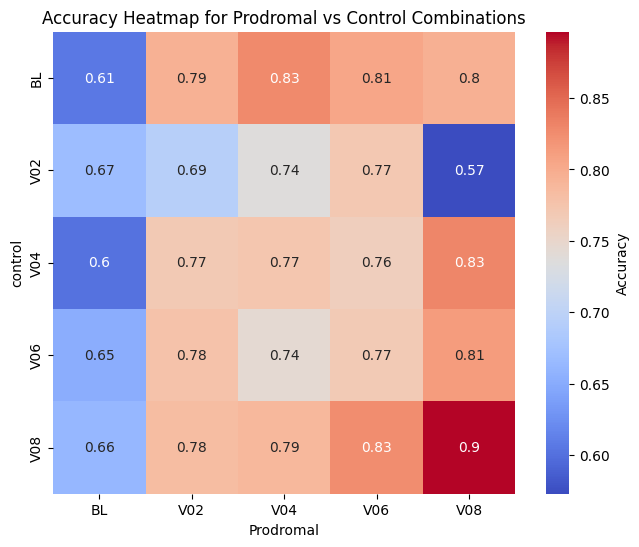

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pro = []
Control= []
acc = []
for i,j in ACCURACY_DICT.items():
    pro.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    acc.append(j)


accuracy_table_pro_control = pd.DataFrame([pro,Control,acc]).T
accuracy_table_pro_control  = accuracy_table_pro_control .rename(columns = {0:'Prodromal', 1:'control', 2: 'Accuracy'})

accuracy_table_pro_control['Accuracy'] = accuracy_table_pro_control['Accuracy'].astype(float)
heatmap_data_ = accuracy_table_pro_control.pivot(index="control", columns="Prodromal", values="Accuracy")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Accuracy'})
plt.title("Accuracy Heatmap for Prodromal vs Control Combinations")

plt.savefig("../heatmaps_plots/accuracy_heatmaps/mitochindria_con_vs_pd_accuracy_heatmap.svg", format='svg')

plt.show()

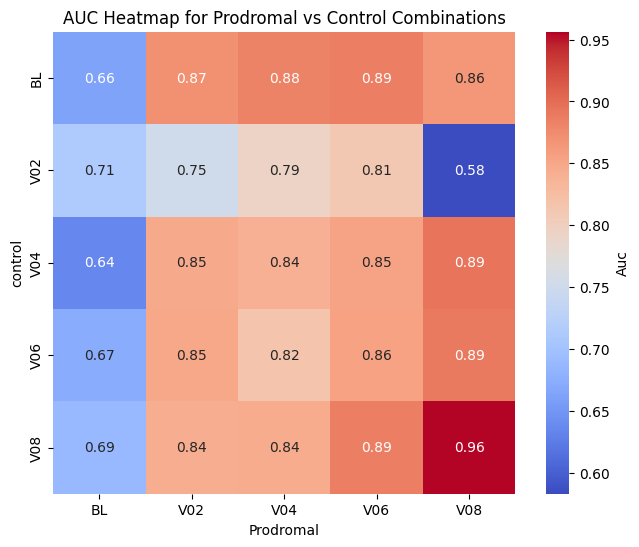

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pro = []
Control= []
auc = []
for i,j in AUC_SCORES.items():
    pro.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    auc.append(j)


auc_table_pro_control = pd.DataFrame([pro,Control,auc]).T
auc_table_pro_control  = auc_table_pro_control .rename(columns = {0:'Prodromal', 1:'control', 2: 'Auc'})

auc_table_pro_control['Auc'] = auc_table_pro_control['Auc'].astype(float)
heatmap_data_ = auc_table_pro_control.pivot(index="control", columns="Prodromal", values="Auc")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Auc'})
plt.title("AUC Heatmap for Prodromal vs Control Combinations")

plt.savefig("../heatmaps_plots/auc_heatmaps/mitochondria_con_vs_pro_auc_heatmap.svg", format='svg')

plt.show()

In [63]:
df_acc = pd.DataFrame(list(ACCURACY_DICT.items()), columns=['Comparison', 'Accuracy'])
df_auc = pd.DataFrame(list(AUC_SCORES.items()), columns=['Comparison', 'AUC'])
#df_f1  = pd.DataFrame(list(F1_SCORES.items()), columns=['Comparison', 'F1'])
df_precision = pd.DataFrame(list(PRECISION_SCORES.items()), columns=['Comparison', 'Precision'])
df_recall = pd.DataFrame(list(RECALL_SCORES.items()), columns=['Comparison', 'Recall'])

import pandas as pd
from functools import reduce

# List of DataFrames to merge
dfs = [df_acc, df_auc, df_precision, df_recall]

# Merge all DataFrames on 'Comparison'
df_all = reduce(lambda left, right: pd.merge(left, right, on='Comparison'), dfs)

df_all.to_csv('../metrics_csv_files/metrics_mitochondria_con_vs_pro.csv',index = False)

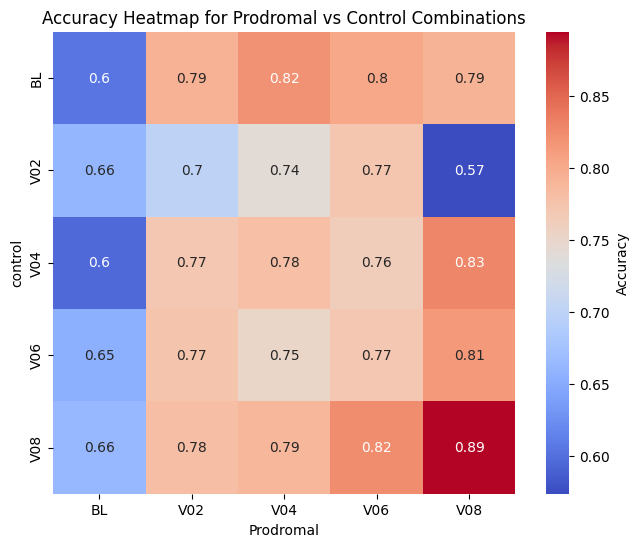

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pro = []
Control= []
acc = []
for i,j in ACCURACY_DICT.items():
    pro.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    acc.append(j)


accuracy_table_pro_control = pd.DataFrame([pro,Control,acc]).T
accuracy_table_pro_control  = accuracy_table_pro_control .rename(columns = {0:'Prodromal', 1:'control', 2: 'Accuracy'})

accuracy_table_pro_control['Accuracy'] = accuracy_table_pro_control['Accuracy'].astype(float)
heatmap_data_ = accuracy_table_pro_control.pivot(index="control", columns="Prodromal", values="Accuracy")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Accuracy'})
plt.title("Accuracy Heatmap for Prodromal vs Control Combinations")
plt.show()

In [61]:
accuracy_table_pro_control

Prodromal control  Accuracy
0         BL      BL  0.604250
1         BL     V06  0.652750
2         BL     V04  0.595292
3         BL     V02  0.660083
4         BL     V08  0.662958
5        V06      BL  0.802000
6        V06     V06  0.770583
7        V06     V04  0.762833
8        V06     V02  0.771708
9        V06     V08  0.824083
10       V04      BL  0.819958
11       V04     V06  0.751458
12       V04     V04  0.780375
13       V04     V02  0.740792
14       V04     V08  0.789125
15       V02      BL  0.793042
16       V02     V06  0.774250
17       V02     V04  0.770833
18       V02     V02  0.699458
19       V02     V08  0.780500
20       V08      BL  0.791875
21       V08     V06  0.814000
22       V08     V04  0.829250
23       V08     V02  0.573500
24       V08     V08  0.894500

In [62]:
heatmap_data_

Prodromal        BL       V02       V04       V06       V08
control                                                    
BL         0.604250  0.793042  0.819958  0.802000  0.791875
V02        0.660083  0.699458  0.740792  0.771708  0.573500
V04        0.595292  0.770833  0.780375  0.762833  0.829250
V06        0.652750  0.774250  0.751458  0.770583  0.814000
V08        0.662958  0.780500  0.789125  0.824083  0.894500

In [63]:

FEATURE_IMPORTANCES['Prodromal_V08_Control_V08_0']
sorted_0_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_Control_V08_0'].items(), key=lambda item: item[1]))


In [64]:
sorted_0_dict_FEATURE_IMPORTANCES_asc

{'ENSG00000070501': -0.6090486471959153,
 'ENSG00000012048': -0.25475959952135185,
 'ENSG00000005156': -0.25410376092248466,
 'ENSG00000103152': -0.24103684662872377,
 'ENSG00000164306': -0.23044691808320575,
 'ENSG00000140398': -0.22490186532314466,
 'ENSG00000140521': -0.20024370671113836,
 'ENSG00000132781': -0.19337410058604823,
 'ENSG00000065978': -0.15910073622186693,
 'ENSG00000067369': -0.15380244829429357,
 'ENSG00000051341': -0.14467733804157967,
 'ENSG00000100601': -0.11380111380649442,
 'ENSG00000160957': -0.10166103345104575,
 'ENSG00000114026': -0.0762142803768468,
 'ENSG00000104884': -0.06606517270377464,
 'ENSG00000076248': -0.002600731724205953,
 'ENSG00000179262': 0.0051726489723365136,
 'ENSG00000065057': 0.014390145386424004,
 'ENSG00000039650': 0.02624070755682943,
 'ENSG00000008405': 0.04228473958356569,
 'ENSG00000170430': 0.0658113586199846,
 'ENSG00000100823': 0.09017154969876724,
 'ENSG00000154328': 0.11618967790613871,
 'ENSG00000138346': 0.12715884985226847,

## sorted_1_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_Control_V08'].items(), key=lambda item: item[1]))
sorted_1_dict_FEATURE_IMPORTANCES_asc

In [65]:
sorted_2_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_Control_V08_0'].items(), key=lambda item: item[1]))
sorted_2_dict_FEATURE_IMPORTANCES_asc

{'ENSG00000070501': -0.6090486471959153,
 'ENSG00000012048': -0.25475959952135185,
 'ENSG00000005156': -0.25410376092248466,
 'ENSG00000103152': -0.24103684662872377,
 'ENSG00000164306': -0.23044691808320575,
 'ENSG00000140398': -0.22490186532314466,
 'ENSG00000140521': -0.20024370671113836,
 'ENSG00000132781': -0.19337410058604823,
 'ENSG00000065978': -0.15910073622186693,
 'ENSG00000067369': -0.15380244829429357,
 'ENSG00000051341': -0.14467733804157967,
 'ENSG00000100601': -0.11380111380649442,
 'ENSG00000160957': -0.10166103345104575,
 'ENSG00000114026': -0.0762142803768468,
 'ENSG00000104884': -0.06606517270377464,
 'ENSG00000076248': -0.002600731724205953,
 'ENSG00000179262': 0.0051726489723365136,
 'ENSG00000065057': 0.014390145386424004,
 'ENSG00000039650': 0.02624070755682943,
 'ENSG00000008405': 0.04228473958356569,
 'ENSG00000170430': 0.0658113586199846,
 'ENSG00000100823': 0.09017154969876724,
 'ENSG00000154328': 0.11618967790613871,
 'ENSG00000138346': 0.12715884985226847,

In [66]:
data.DIAGNOSIS.value_counts()

DIAGNOSIS
PD           1716
Control       869
Prodromal     254
Name: count, dtype: int64

In [67]:
data['DIAGNOSIS_2'] = data['DIAGNOSIS']

/tmp/ipykernel_183226/3022521848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIAGNOSIS_2'] = data['DIAGNOSIS']


In [68]:
data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.Prodromal', 'PD': '3.PD'}, inplace=True)


/tmp/ipykernel_183226/1258779229.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.Prodromal', 'PD': '3.PD'}, inplace=True)
/tmp/ipykernel_183226/1258779229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.

In [69]:
data['New_Time_Point'] = data['DIAGNOSIS'] + '_' + data['Time_Point']
data['New_Time_Point_2'] = data['DIAGNOSIS_2'] + '_' + data['Time_Point']

/tmp/ipykernel_183226/3372653969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['New_Time_Point'] = data['DIAGNOSIS'] + '_' + data['Time_Point']
/tmp/ipykernel_183226/3372653969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['New_Time_Point_2'] = data['DIAGNOSIS_2'] + '_' + data['Time_Point']


In [70]:
data = data.sort_values(by = 'New_Time_Point')

In [71]:
tmp_data = data[data.Time_Point !='V02']

In [72]:
tmp_data

DIAGNOSIS Patient_Name Time_Point  ENSG00000128951  ENSG00000179262  \
2979  1.Control         4067         BL         37.18860         4.904970   
1675  1.Control         3555         BL         37.44740         2.478460   
1672  1.Control         3554         BL         35.18810         5.525550   
1663  1.Control         3551         BL         56.74300         6.014910   
1844  1.Control         3614         BL         31.85680         3.801790   
...         ...          ...        ...              ...              ...   
1047       3.PD         3352        V08          9.76085         0.929768   
3260       3.PD         4099        V08         40.16530         3.054130   
578        3.PD         3154        V08         39.35370         2.947110   
1992       3.PD         3700        V08         46.34870         2.875660   
1622       3.PD         3530        V08         31.93720         3.403420   

      ENSG00000114026  ENSG00000051341  ENSG00000076248  ENSG00000104884  \
2979         4.836210         0.746782         3.508020         1.184190   
1675         4.137930         1.003330         2.529330         0.778523   
1672         4.643620         0.625902         2.484180         0.992975   
1663         7.491670         1.676690         3.718030         1.926670   
1844         3.569420         1.269840         1.697220         0.756572   
...               ...              ...              ...              ...   
1047         0.890893         0.241289         0.793222         0.370031   
3260         3.362820         0.930843         3.033630         1.033030   
578          3.823230         0.709551         3.295990         0.977768   
1992         3.235300         0.875059         2.727840         1.099080   
1622         2.561270         0.746676         1.924550         0.587091   

      ENSG00000170430  ...  ENSG00000132781  ENSG00000100823  ENSG00000140398  \
2979          6.92071  ...          4.71760         21.78290         3.484700   
1675          6.21612  ...          4.55871         14.68530         2.444060   
1672          4.77400  ...          6.22209         12.65730         2.980860   
1663         10.87780  ...         10.35820         15.80670         4.687420   
1844          4.59095  ...          3.77420         14.21760         3.041110   
...               ...  ...              ...              ...              ...   
1047          1.54699  ...          1.43227          5.40956         0.593909   
3260          8.62330  ...          4.91427         19.86150         3.283580   
578           7.54205  ...          4.36842         22.23870         3.657460   
1992          3.90116  ...          3.96230         14.28070         2.410730   
1622          4.61662  ...          3.56315         12.41180         1.150310   

      ENSG00000100601  ENSG00000103152  ENSG00000067369  ENSG00000154328  \
2979         4.020060          9.38589          8.44807         4.683610   
1675         4.510800          6.54863          9.58147         2.316600   
1672         4.659960          6.88679          5.10037         1.941440   
1663         9.760400         11.87870         14.47460         3.922670   
1844         3.200520          6.25020          3.68204         1.738670   
...               ...              ...              ...              ...   
1047         0.960342          2.15646          2.42532         0.908831   
3260         3.991400          9.31232          7.85185         2.540580   
578          4.734370          8.92418          9.82355         3.269720   
1992         4.180610          6.14682          6.82890         2.223160   
1622         2.558050          6.22193          6.15245         2.395390   

      DIAGNOSIS_2  New_Time_Point  New_Time_Point_2  
2979      Control    1.Control_BL        Control_BL  
1675      Control    1.Control_BL        Control_BL  
1672      Control    1.Control_BL        Control_BL  
1663      Control    1.Control_BL        Control_BL  
1844      Co

In [73]:
df = pd.DataFrame(sorted_2_dict_FEATURE_IMPORTANCES_asc.items())
df[2] = np.abs(df[1])
df = df.sort_values(by = 2, ascending=False)
df

0         1         2
0   ENSG00000070501 -0.609049  0.609049
26  ENSG00000225830  0.265213  0.265213
1   ENSG00000012048 -0.254760  0.254760
2   ENSG00000005156 -0.254104  0.254104
3   ENSG00000103152 -0.241037  0.241037
4   ENSG00000164306 -0.230447  0.230447
5   ENSG00000140398 -0.224902  0.224902
25  ENSG00000116288  0.222890  0.222890
6   ENSG00000140521 -0.200244  0.200244
7   ENSG00000132781 -0.193374  0.193374
24  ENSG00000128951  0.180848  0.180848
8   ENSG00000065978 -0.159101  0.159101
9   ENSG00000067369 -0.153802  0.153802
10  ENSG00000051341 -0.144677  0.144677
23  ENSG00000138346  0.127159  0.127159
22  ENSG00000154328  0.116190  0.116190
11  ENSG00000100601 -0.113801  0.113801
12  ENSG00000160957 -0.101661  0.101661
21  ENSG00000100823  0.090172  0.090172
13  ENSG00000114026 -0.076214  0.076214
14  ENSG00000104884 -0.066065  0.066065
20  ENSG00000170430  0.065811  0.065811
19  ENSG00000008405  0.042285  0.042285
18  ENSG00000039650  0.026241  0.026241
17  ENSG00000065057  0.014390  0.014390
16  ENSG00000179262  0.005173  0.005173
15  ENSG00000076248 -0.002601  0.002601

In [74]:
tmp_data

DIAGNOSIS Patient_Name Time_Point  ENSG00000128951  ENSG00000179262  \
2979  1.Control         4067         BL         37.18860         4.904970   
1675  1.Control         3555         BL         37.44740         2.478460   
1672  1.Control         3554         BL         35.18810         5.525550   
1663  1.Control         3551         BL         56.74300         6.014910   
1844  1.Control         3614         BL         31.85680         3.801790   
...         ...          ...        ...              ...              ...   
1047       3.PD         3352        V08          9.76085         0.929768   
3260       3.PD         4099        V08         40.16530         3.054130   
578        3.PD         3154        V08         39.35370         2.947110   
1992       3.PD         3700        V08         46.34870         2.875660   
1622       3.PD         3530        V08         31.93720         3.403420   

      ENSG00000114026  ENSG00000051341  ENSG00000076248  ENSG00000104884  \
2979         4.836210         0.746782         3.508020         1.184190   
1675         4.137930         1.003330         2.529330         0.778523   
1672         4.643620         0.625902         2.484180         0.992975   
1663         7.491670         1.676690         3.718030         1.926670   
1844         3.569420         1.269840         1.697220         0.756572   
...               ...              ...              ...              ...   
1047         0.890893         0.241289         0.793222         0.370031   
3260         3.362820         0.930843         3.033630         1.033030   
578          3.823230         0.709551         3.295990         0.977768   
1992         3.235300         0.875059         2.727840         1.099080   
1622         2.561270         0.746676         1.924550         0.587091   

      ENSG00000170430  ...  ENSG00000132781  ENSG00000100823  ENSG00000140398  \
2979          6.92071  ...          4.71760         21.78290         3.484700   
1675          6.21612  ...          4.55871         14.68530         2.444060   
1672          4.77400  ...          6.22209         12.65730         2.980860   
1663         10.87780  ...         10.35820         15.80670         4.687420   
1844          4.59095  ...          3.77420         14.21760         3.041110   
...               ...  ...              ...              ...              ...   
1047          1.54699  ...          1.43227          5.40956         0.593909   
3260          8.62330  ...          4.91427         19.86150         3.283580   
578           7.54205  ...          4.36842         22.23870         3.657460   
1992          3.90116  ...          3.96230         14.28070         2.410730   
1622          4.61662  ...          3.56315         12.41180         1.150310   

      ENSG00000100601  ENSG00000103152  ENSG00000067369  ENSG00000154328  \
2979         4.020060          9.38589          8.44807         4.683610   
1675         4.510800          6.54863          9.58147         2.316600   
1672         4.659960          6.88679          5.10037         1.941440   
1663         9.760400         11.87870         14.47460         3.922670   
1844         3.200520          6.25020          3.68204         1.738670   
...               ...              ...              ...              ...   
1047         0.960342          2.15646          2.42532         0.908831   
3260         3.991400          9.31232          7.85185         2.540580   
578          4.734370          8.92418          9.82355         3.269720   
1992         4.180610          6.14682          6.82890         2.223160   
1622         2.558050          6.22193          6.15245         2.395390   

      DIAGNOSIS_2  New_Time_Point  New_Time_Point_2  
2979      Control    1.Control_BL        Control_BL  
1675      Control    1.Control_BL        Control_BL  
1672      Control    1.Control_BL        Control_BL  
1663      Control    1.Control_BL        Control_BL  
1844      Co

In [75]:
tmp_data.New_Time_Point_2.unique()

array(['Control_BL', 'Control_V04', 'Control_V06', 'Control_V08',
       'Prodromal_BL', 'Prodromal_V04', 'Prodromal_V06', 'Prodromal_V08',
       'PD_BL', 'PD_V04', 'PD_V06', 'PD_V08'], dtype=object)

In [76]:
genes = df[0].values.tolist()

In [77]:
control_tmp_data = tmp_data[tmp_data['New_Time_Point_2'].str.startswith('Control')]
control_tmp_data = control_tmp_data.sort_values(by = 'New_Time_Point') 
control_tmp_data

DIAGNOSIS Patient_Name Time_Point  ENSG00000128951  ENSG00000179262  \
2979  1.Control         4067         BL          37.1886          4.90497   
497   1.Control         3114         BL          25.8303          4.55138   
782   1.Control         3222         BL          40.6069          2.29206   
777   1.Control         3221         BL          31.9596          4.79517   
596   1.Control         3161         BL          15.9472          3.97968   
...         ...          ...        ...              ...              ...   
1090  1.Control         3361        V08          37.7801          4.01221   
1722  1.Control         3570        V08          32.9575          3.49744   
1598  1.Control         3523        V08          17.4433          2.14258   
2498  1.Control         3950        V08          36.5164          6.50762   
722   1.Control         3206        V08          58.4599          5.89544   

      ENSG00000114026  ENSG00000051341  ENSG00000076248  ENSG00000104884  \
2979          4.83621         0.746782          3.50802         1.184190   
497           5.26165         0.522728          2.38214         1.018360   
782           2.31834         0.583415          1.63057         0.322208   
777           4.97410         0.574086          2.80804         1.412730   
596           2.65527         0.456417          1.53179         0.684448   
...               ...              ...              ...              ...   
1090          4.18232         1.025700          1.53436         0.916050   
1722          4.54428         0.905319          2.46191         1.161800   
1598          2.02114         0.454789          1.31507         0.429180   
2498          5.29185         1.567350          1.81905         1.524200   
722           6.30491         1.311160          3.80868         1.286500   

      ENSG00000170430  ...  ENSG00000132781  ENSG00000100823  ENSG00000140398  \
2979          6.92071  ...          4.71760         21.78290         3.484700   
497           3.69205  ...          4.20113         18.83620         4.294630   
782           3.69590  ...          3.04722          9.41278         1.675930   
777           6.48665  ...          5.83751         20.01960         2.900860   
596           3.80952  ...          3.21359         15.14530         1.524200   
...               ...  ...              ...              ...              ...   
1090          5.09253  ...          4.96532         10.68210         2.600350   
1722          6.24888  ...          4.93010         14.48380         2.023230   
1598          3.11001  ...          2.05108          7.32909         0.903771   
2498          5.87056  ...          8.49620         12.19560         5.286540   
722           9.94688  ...          7.77432         25.11660         3.039710   

      ENSG00000100601  ENSG00000103152  ENSG00000067369  ENSG00000154328  \
2979          4.02006          9.38589          8.44807         4.683610   
497           3.00982          5.61130          8.70066         2.411470   
782           2.17810          4.38430          5.35357         0.987221   
777           4.41089          7.06867          6.80454         2.646960   
596           2.59674          3.83322          5.08349         1.913360   
...               ...              ...              ...              ...   
1090          3.24686          5.79354          9.52756         2.817890   
1722          4.71011          8.08844          6.98078         1.986960   
1598          1.98438          2.64933          3.97723         1.198660   
2498          3.47111          6.94006         10.66310         2.167200   
722           6.88936          7.87797         11.93070         4.220280   

      DIAGNOSIS_2  New_Time_Point  New_Time_Point_2  
2979      Control    1.Control_BL        Control_BL  
497       Control    1.Control_BL        Control_BL  
782       Control    1.Control_BL        Control_BL  
777       Control    1.Control_BL        Control_BL  
596       Co

In [78]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return ensembleid

tmp_df = df.reset_index()


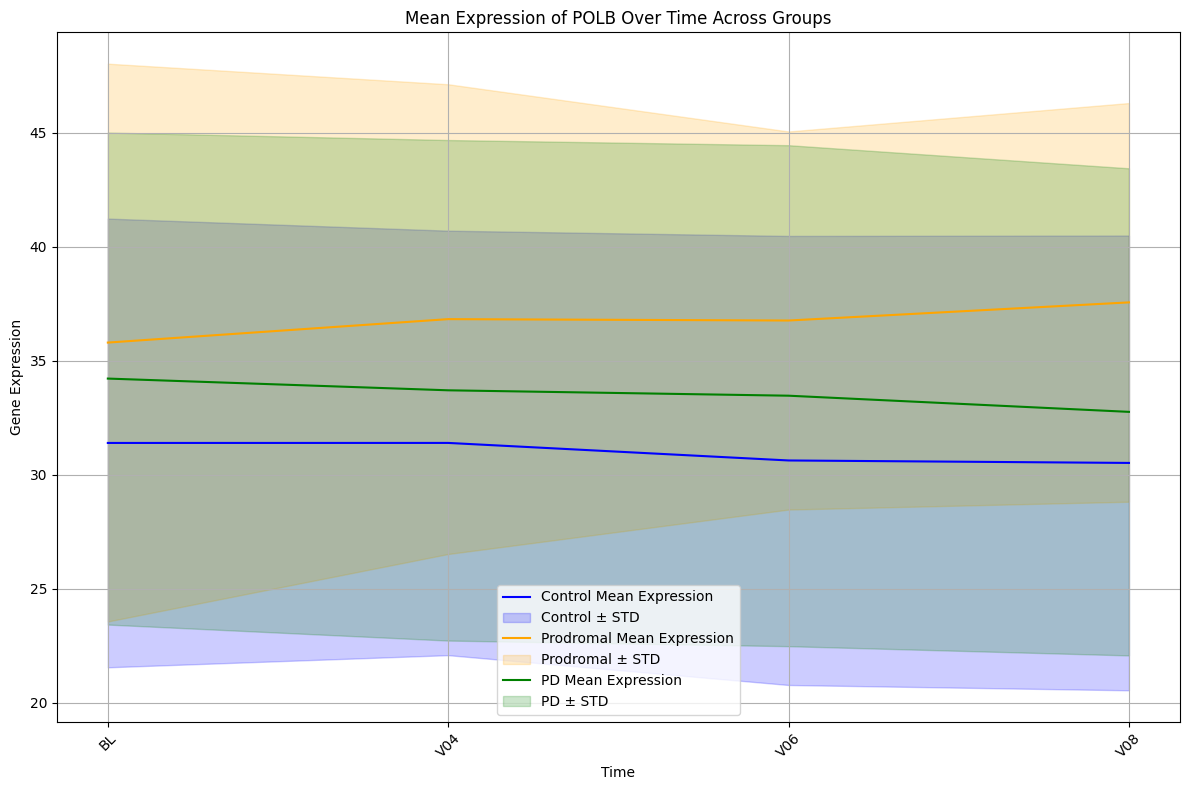

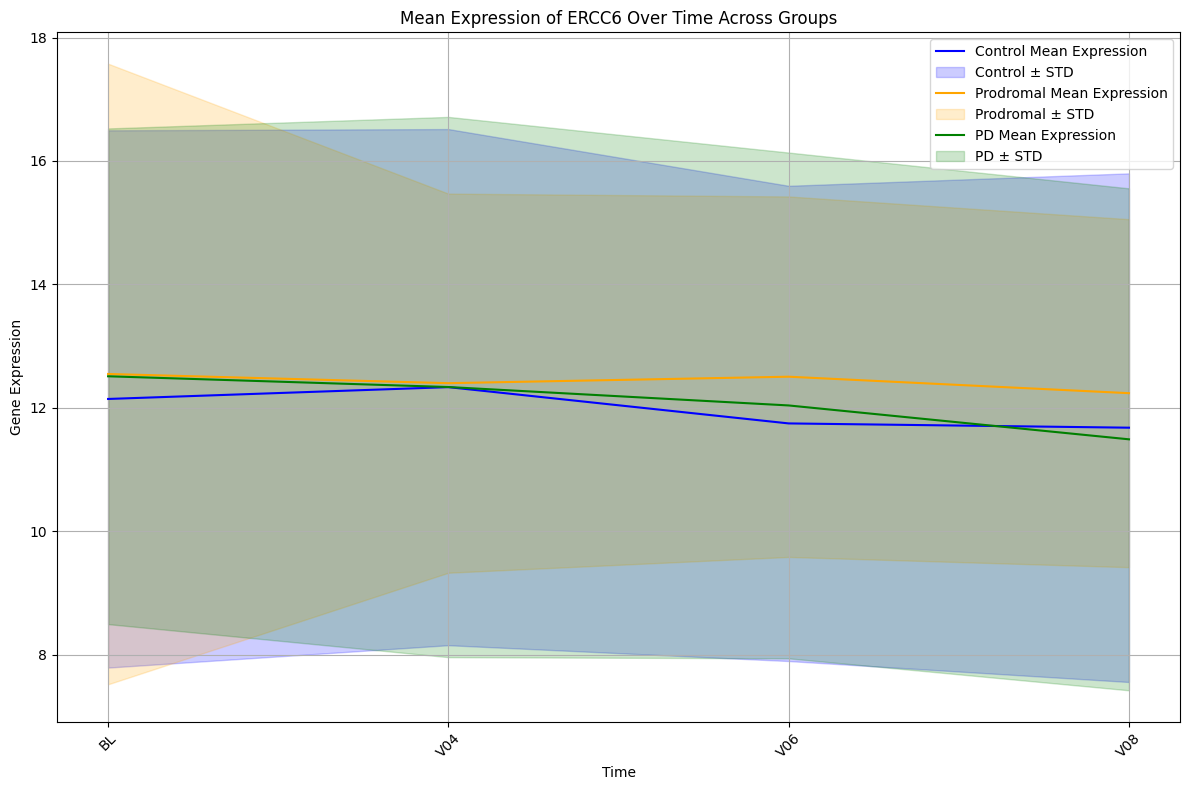

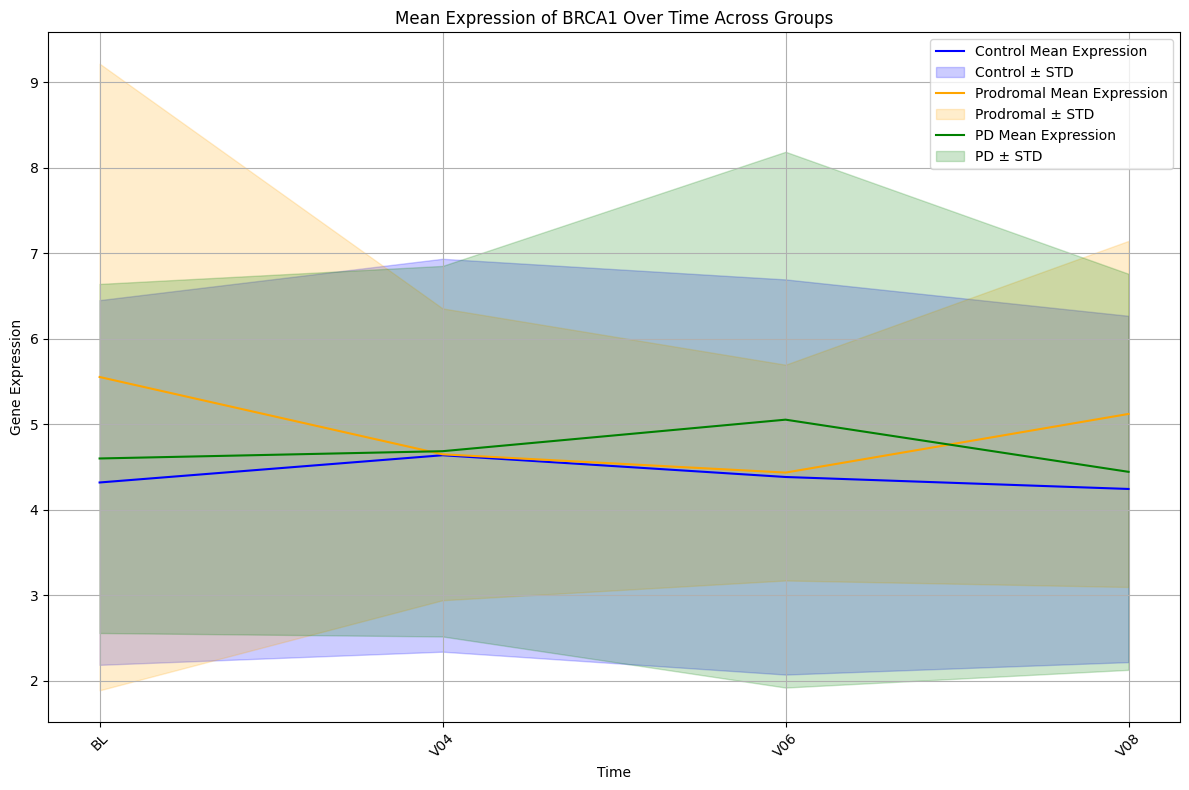

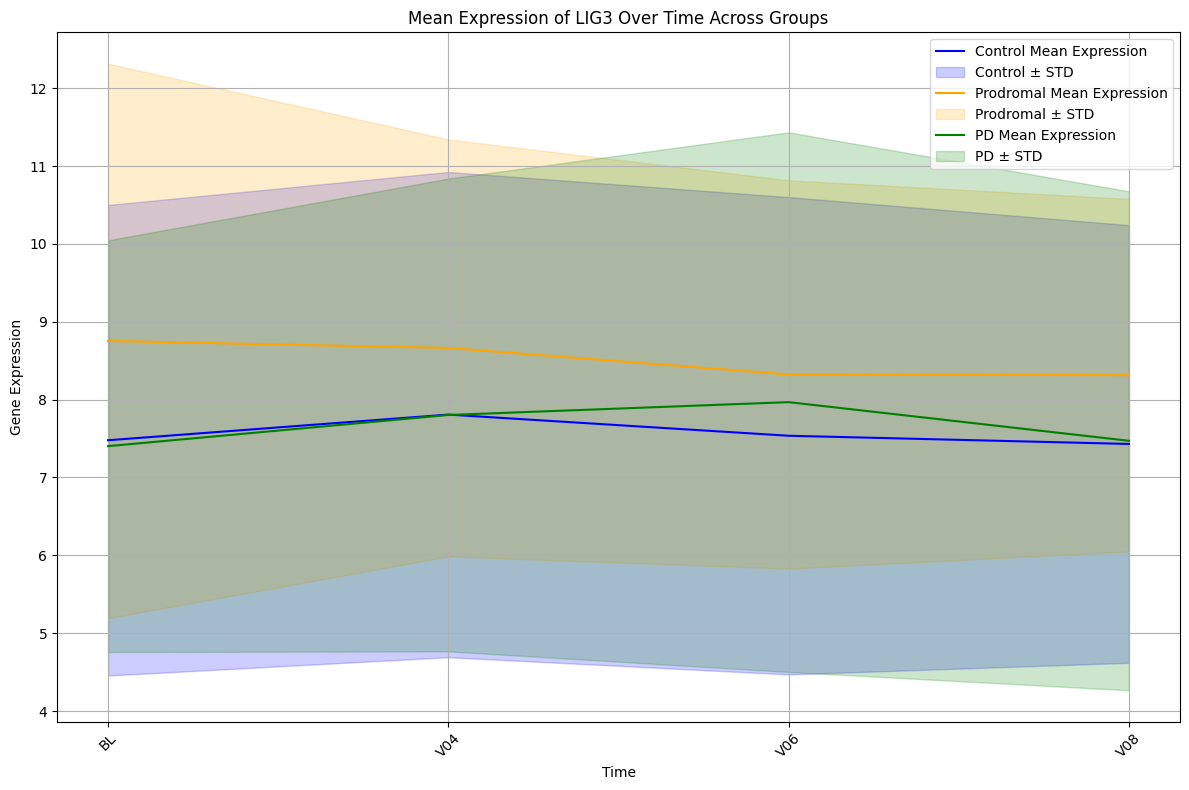

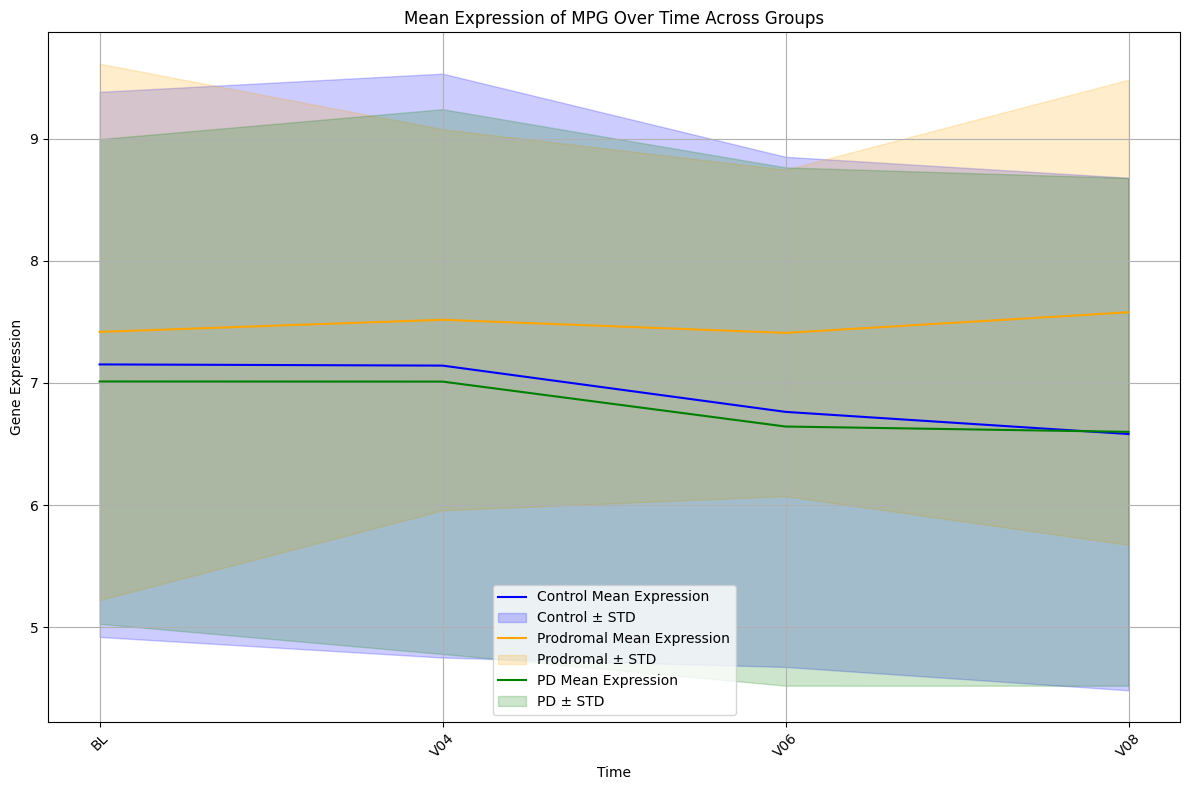

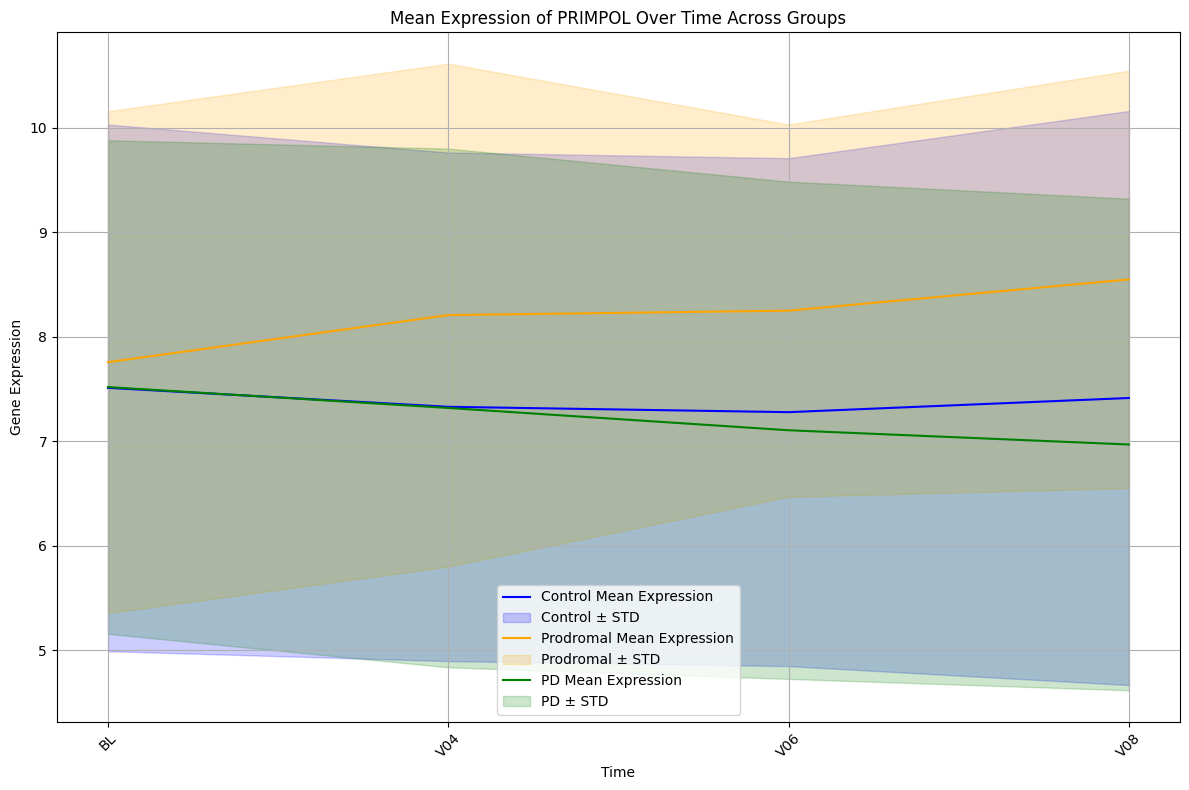

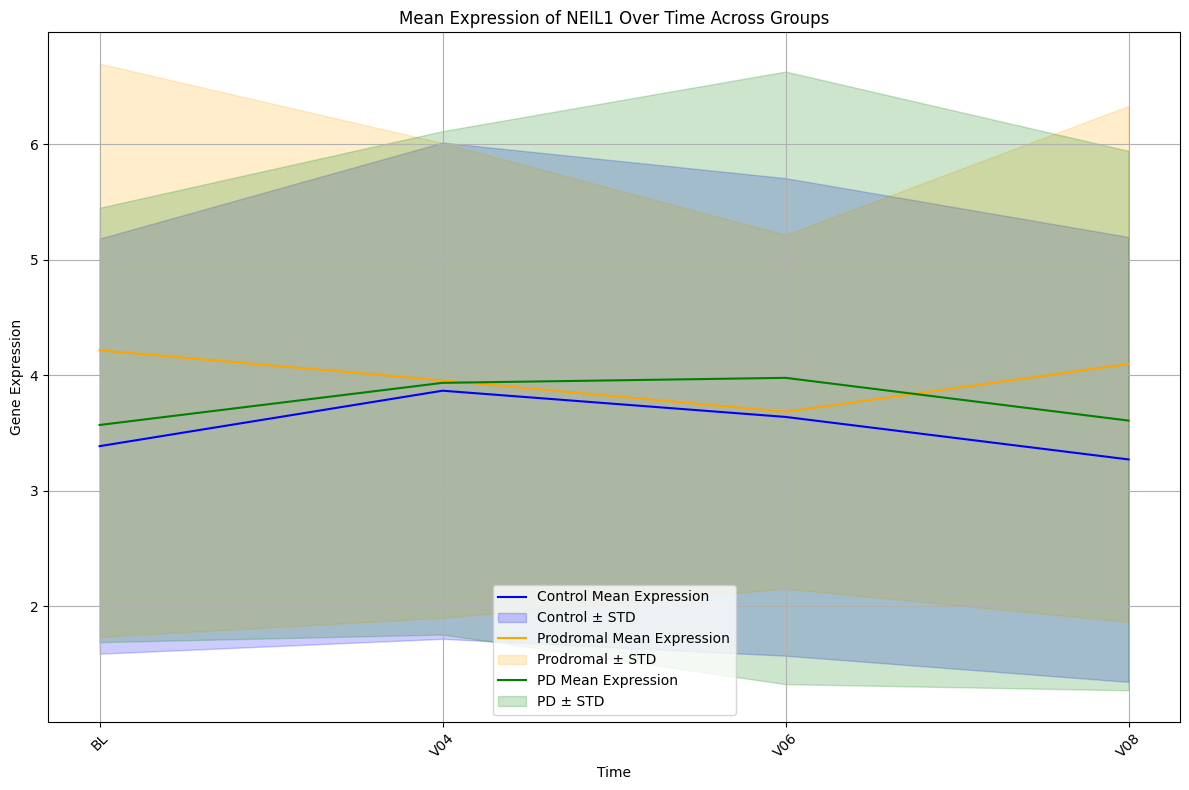

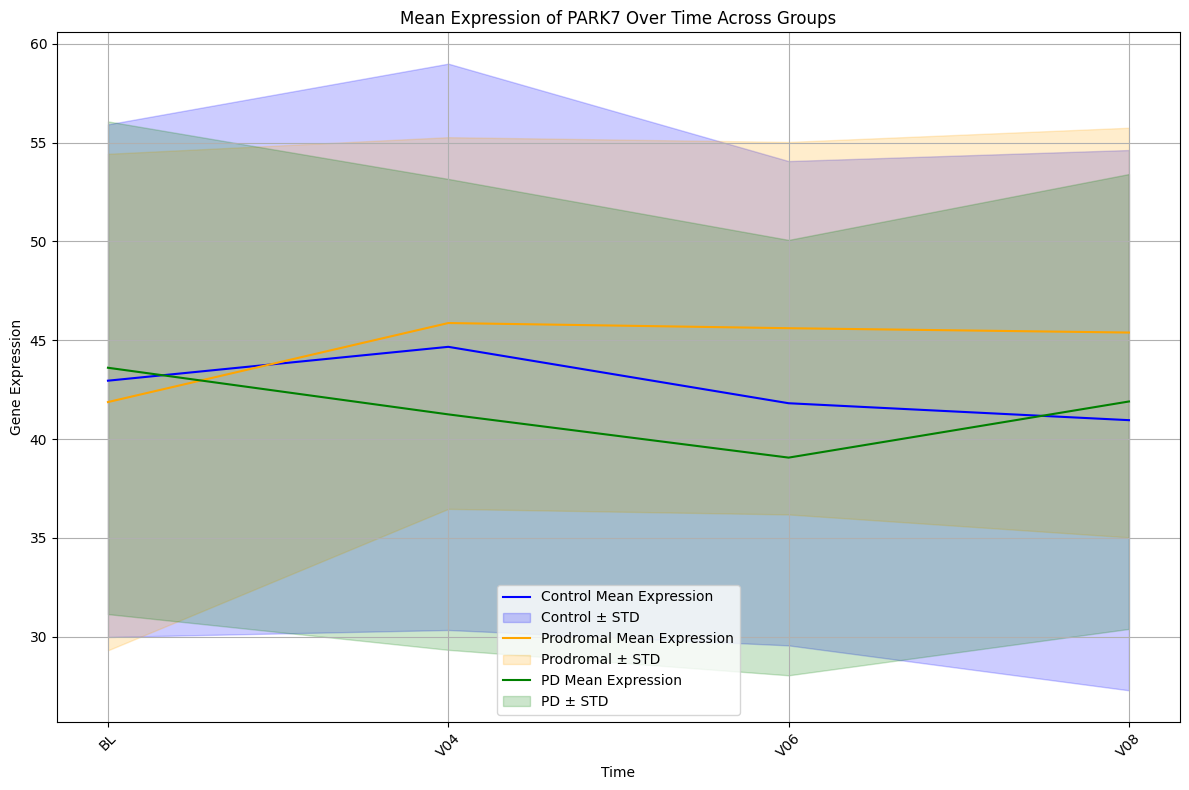

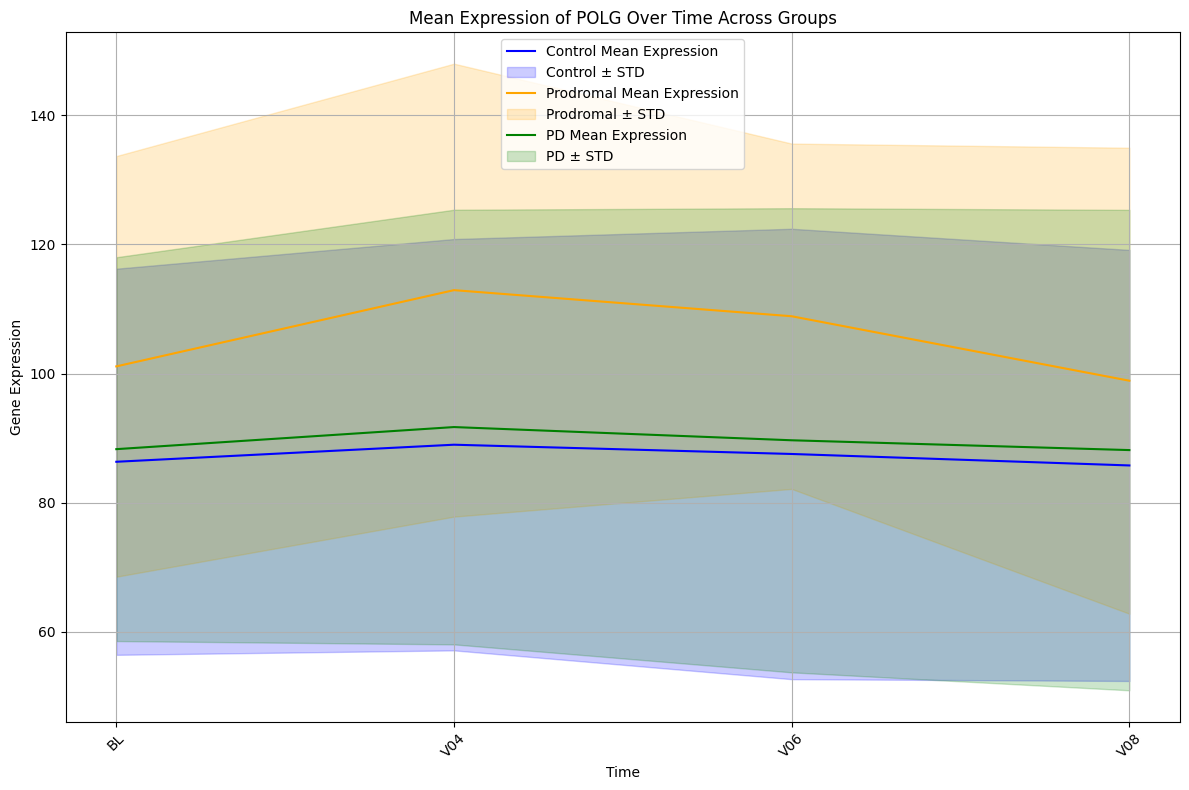

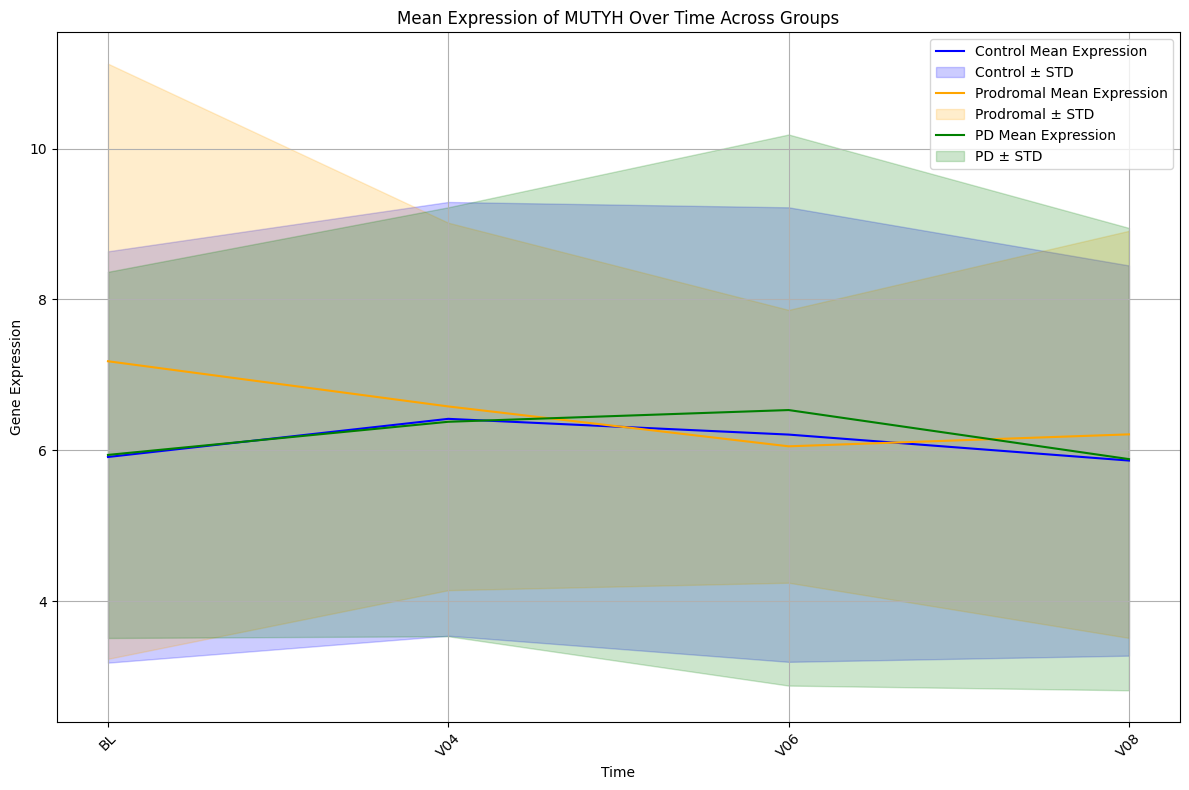

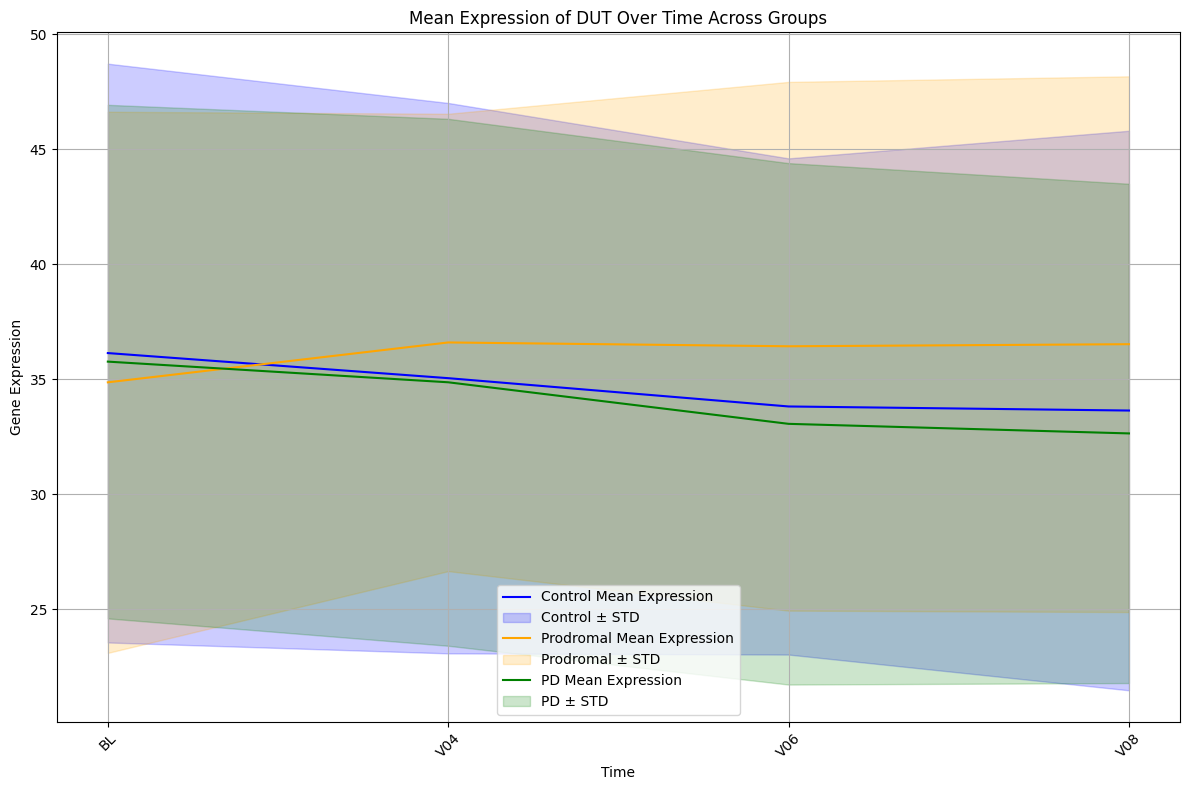

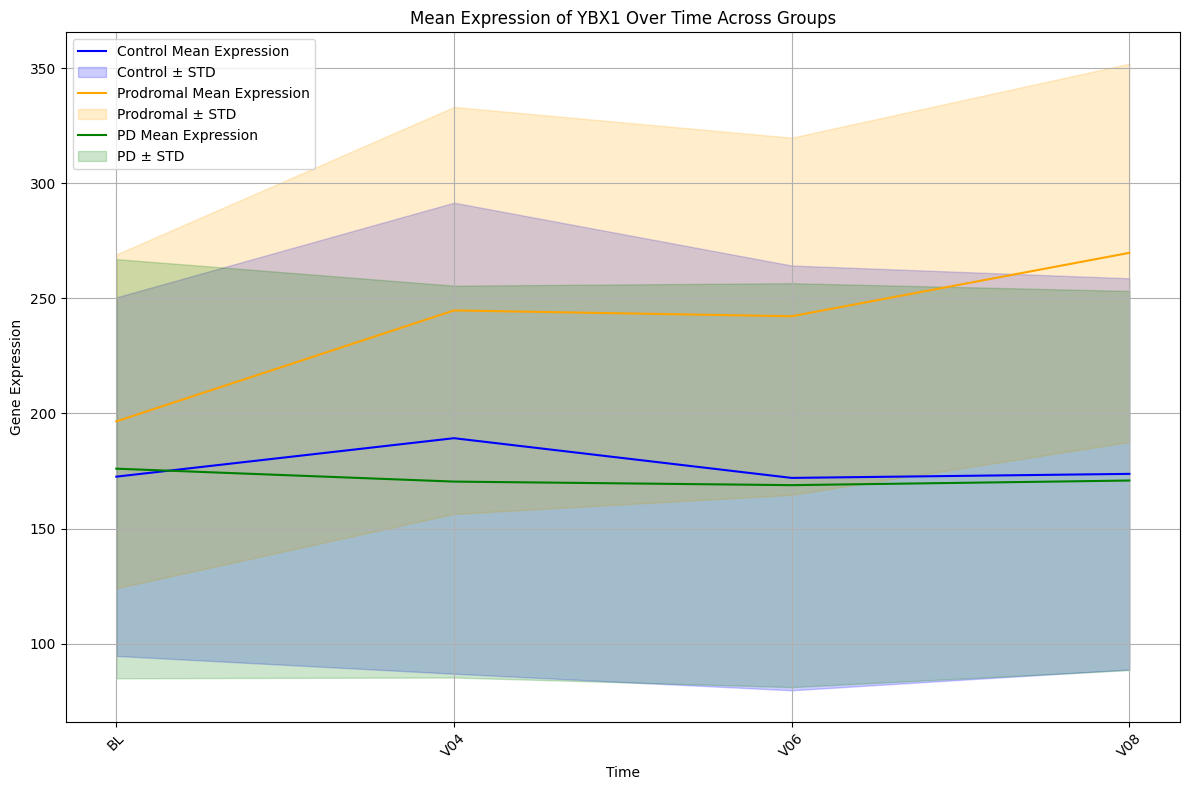

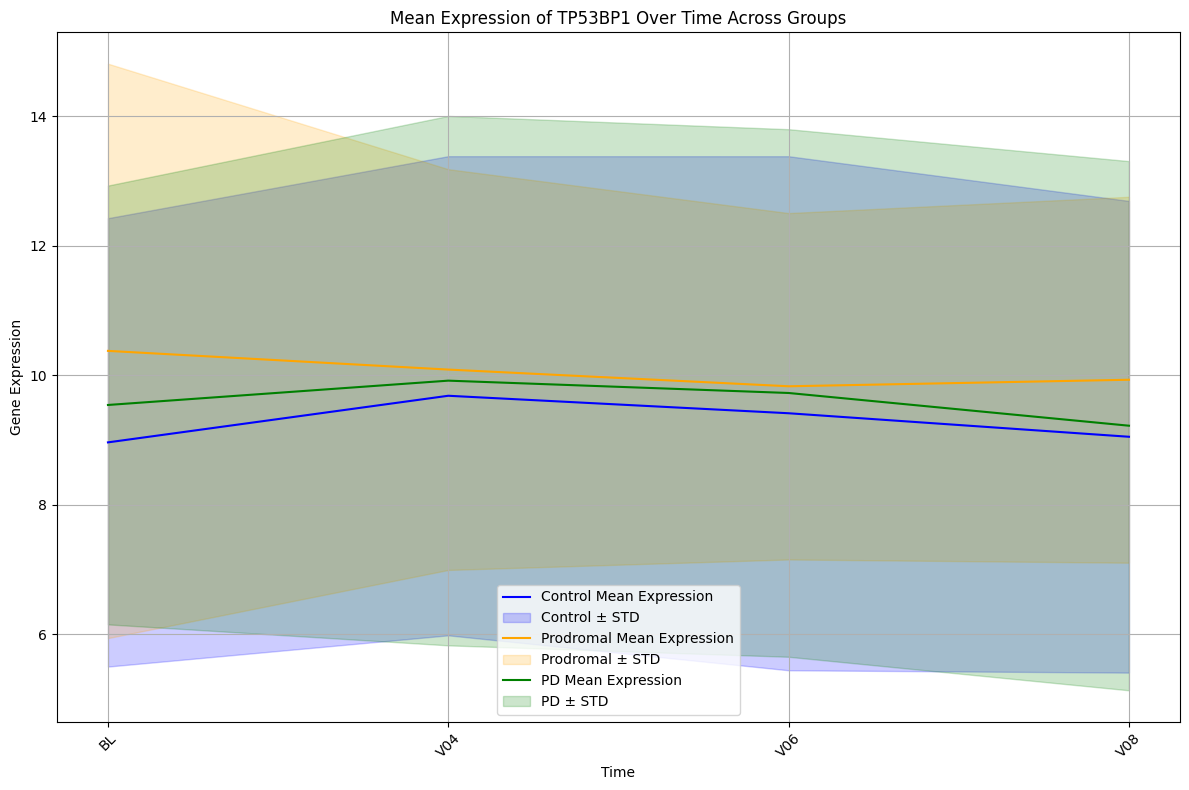

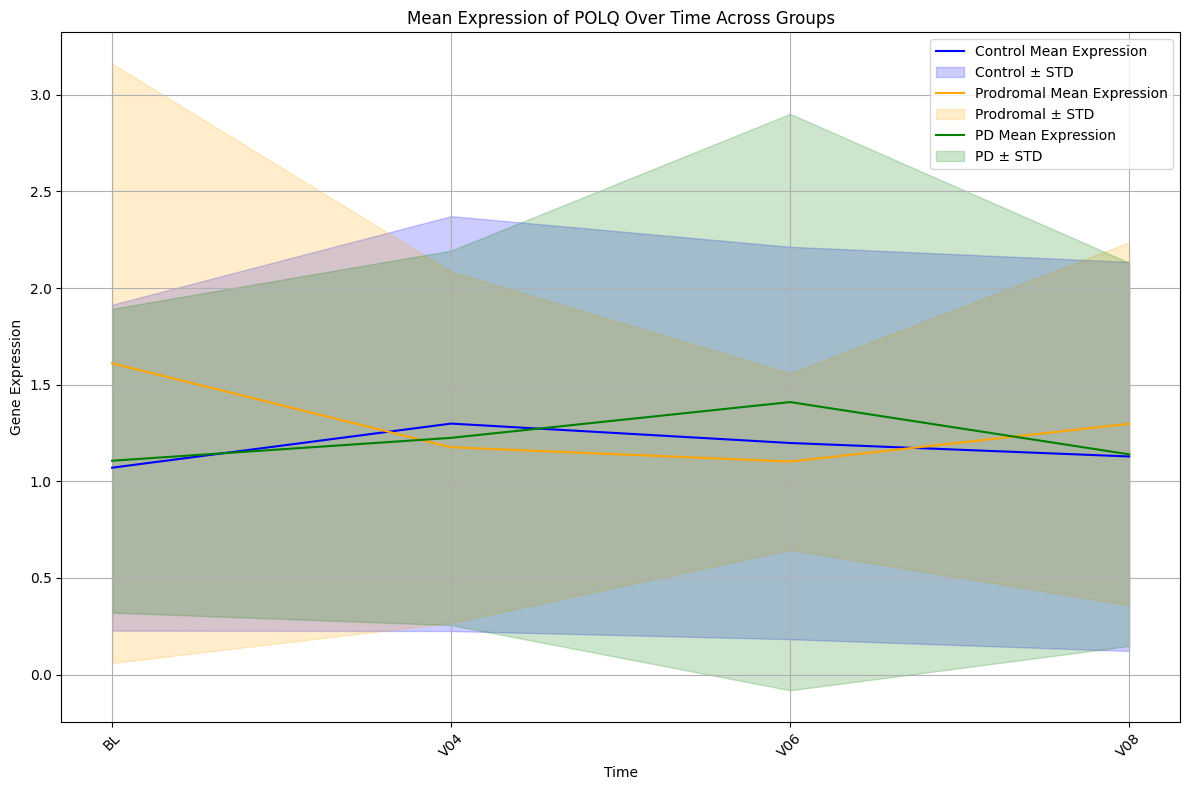

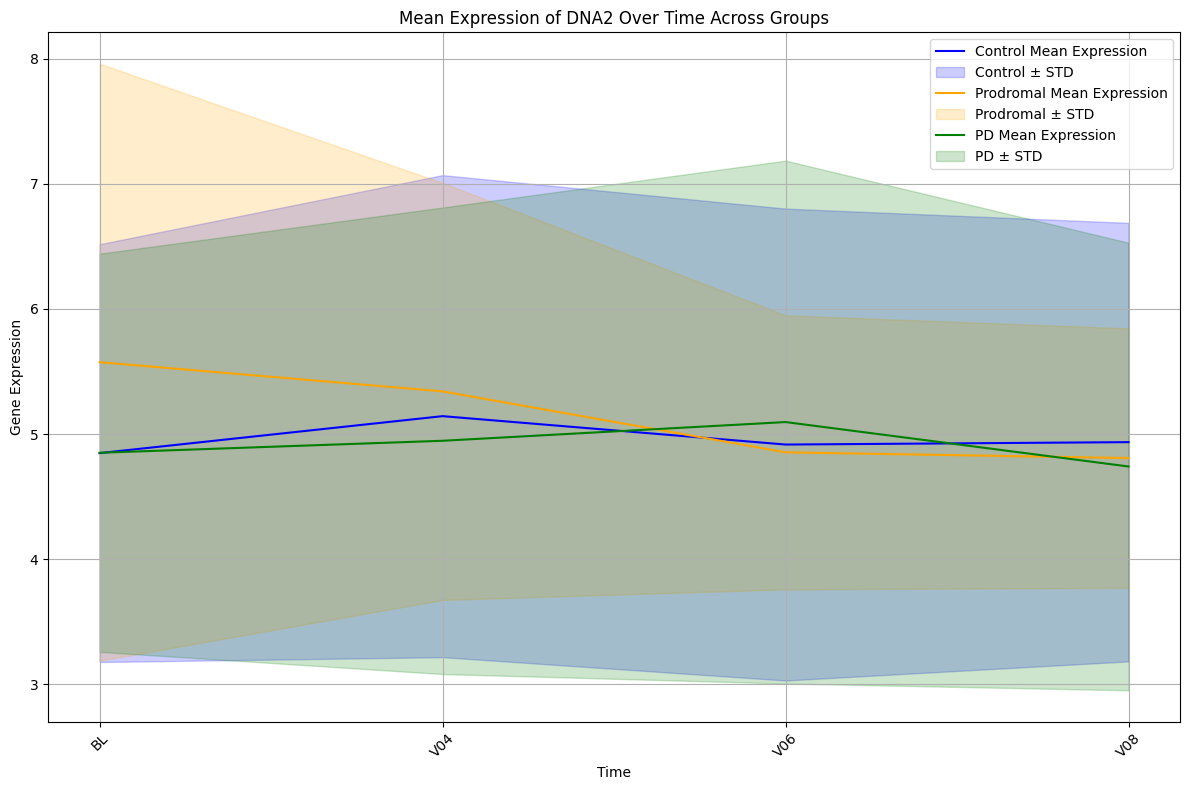

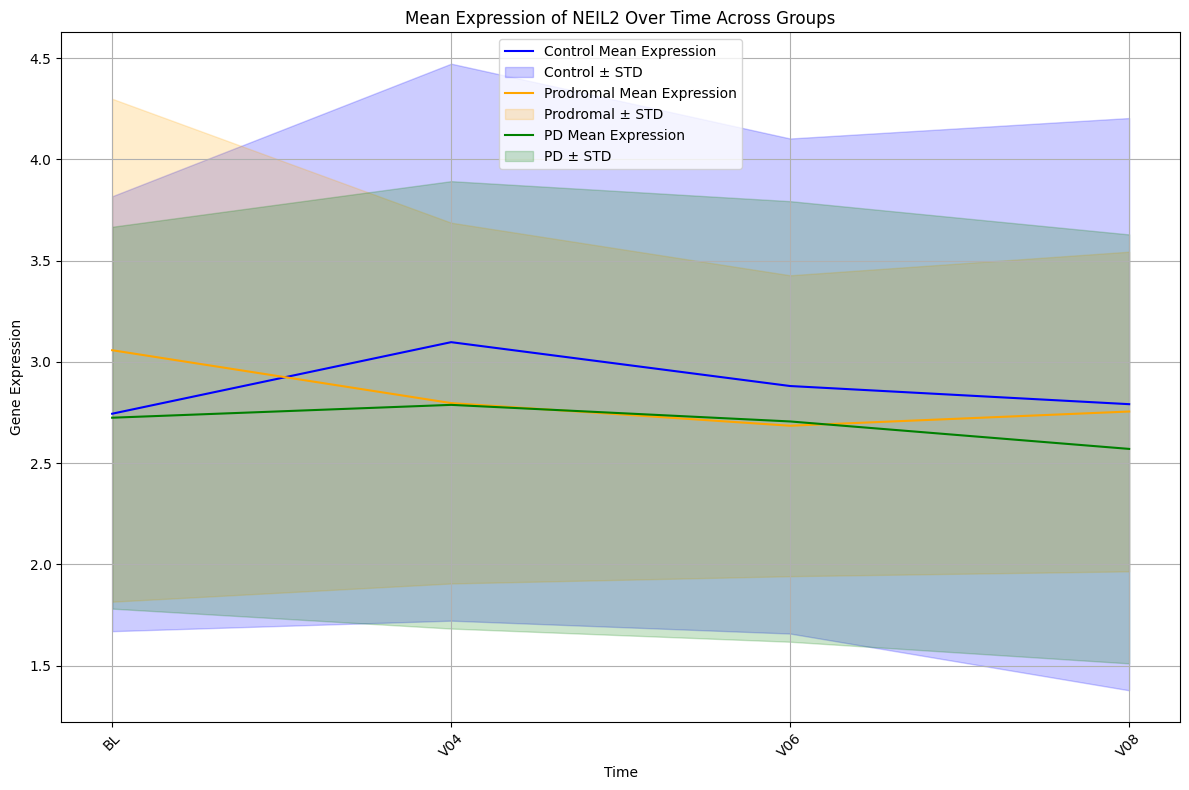

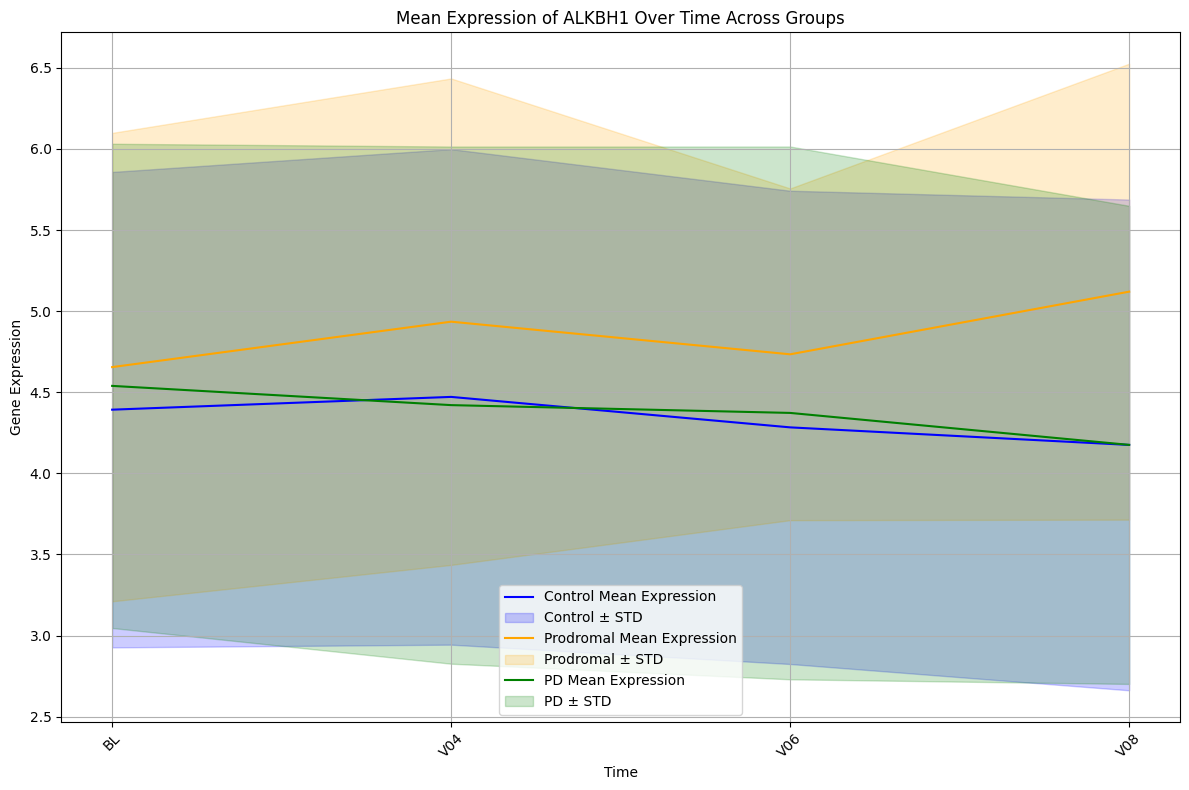

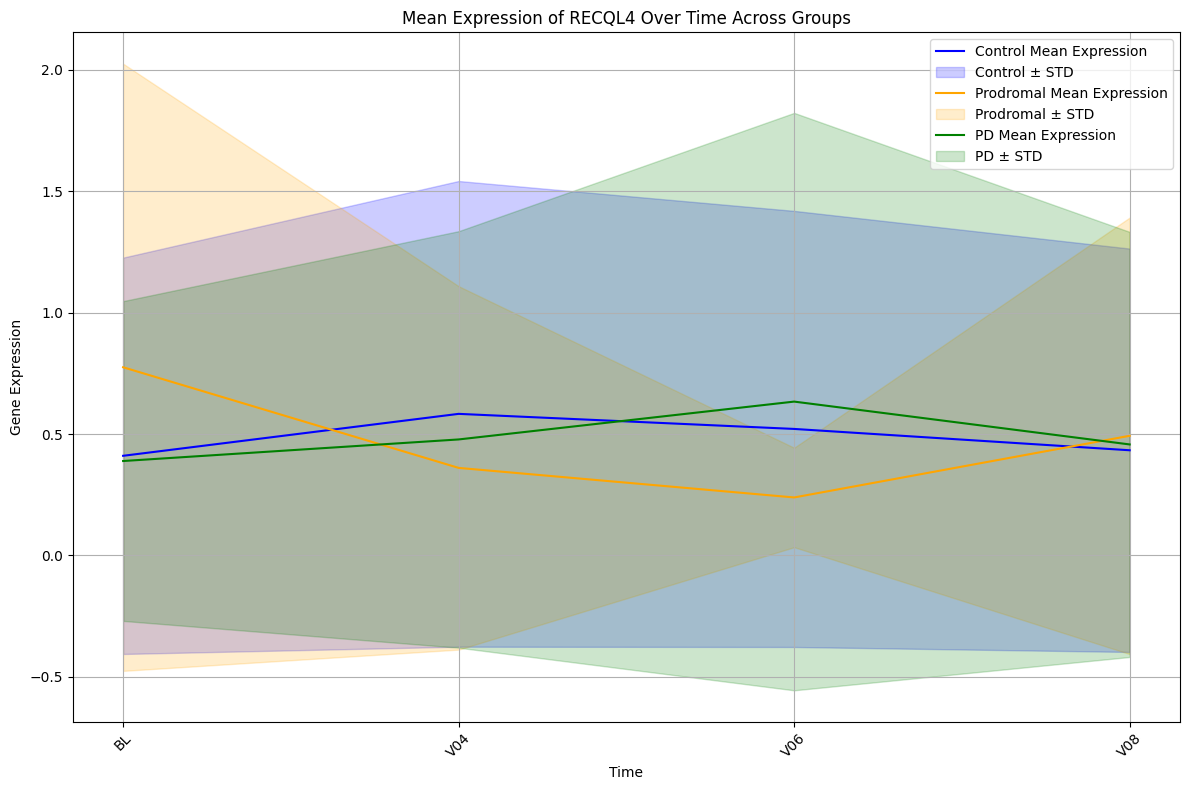

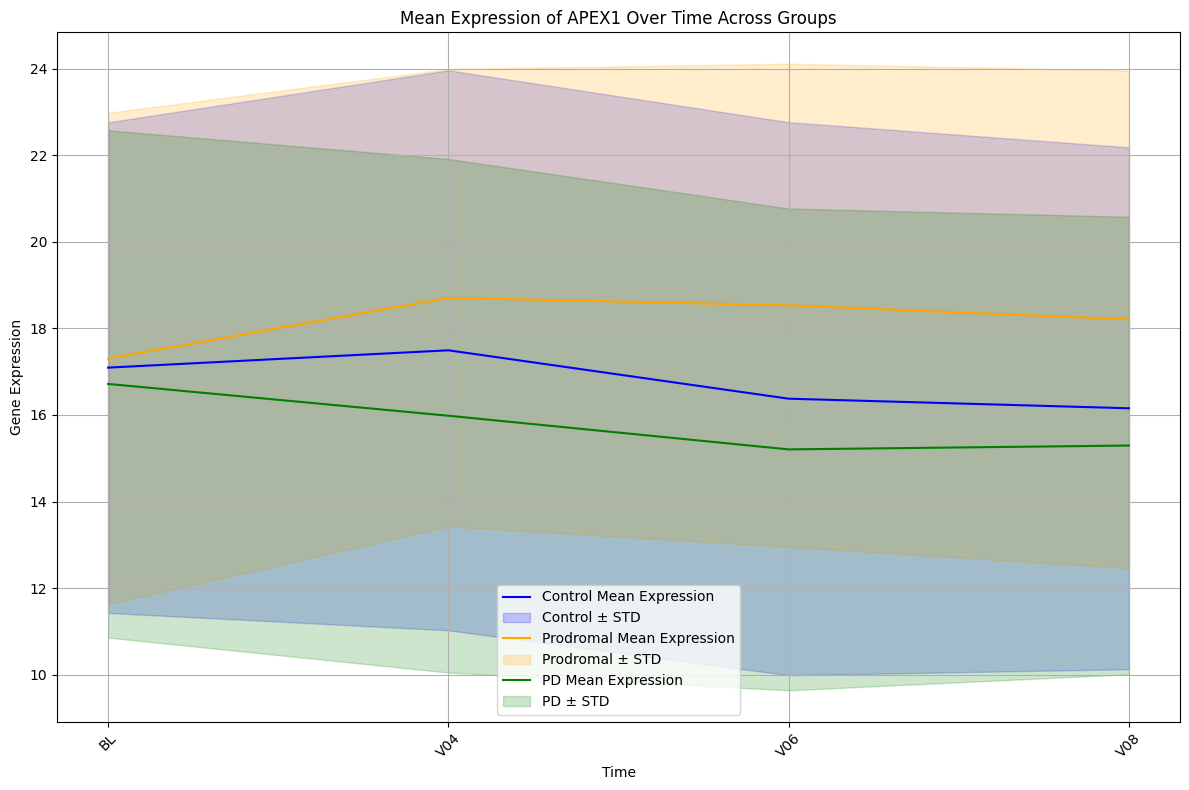

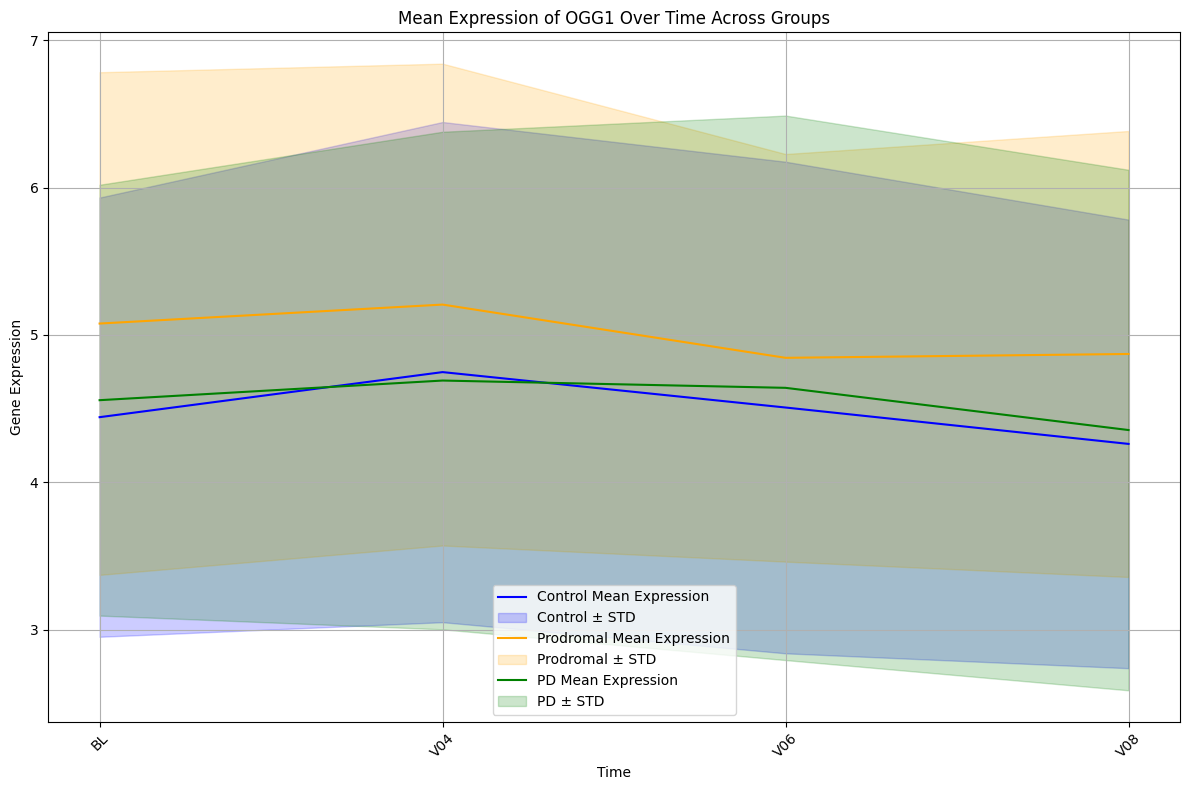

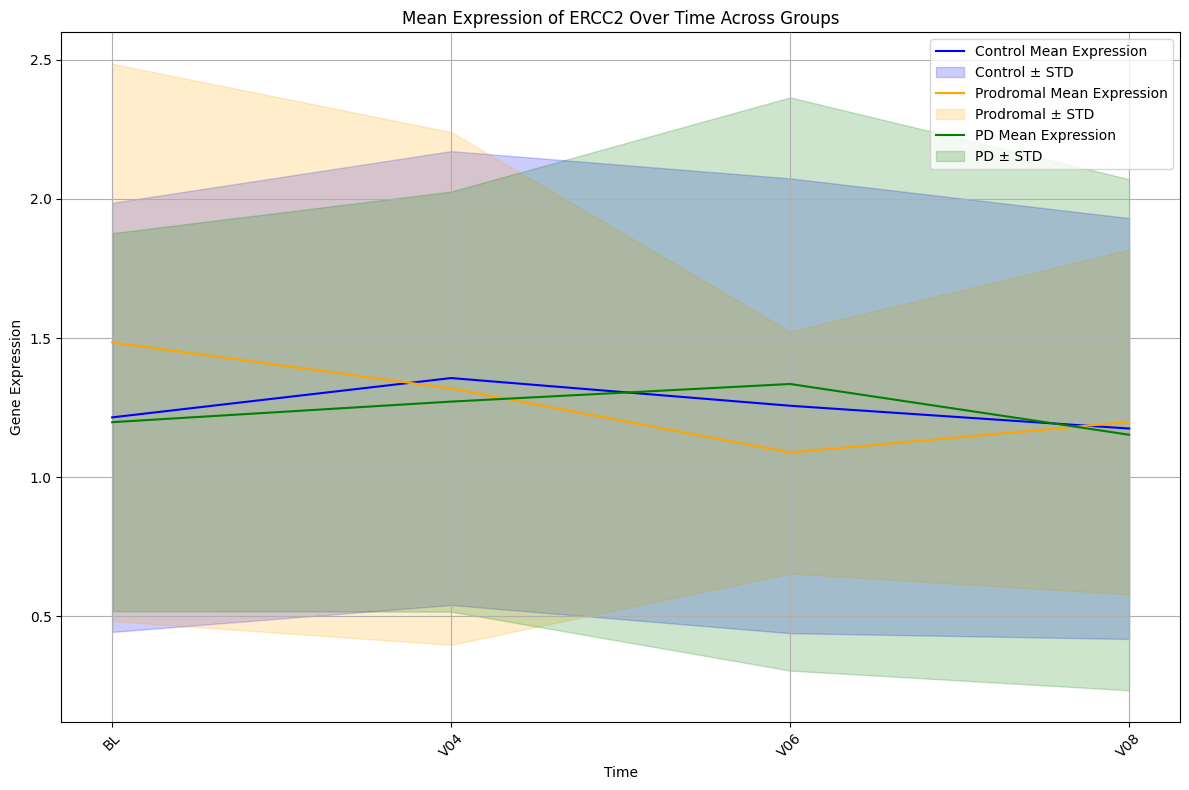

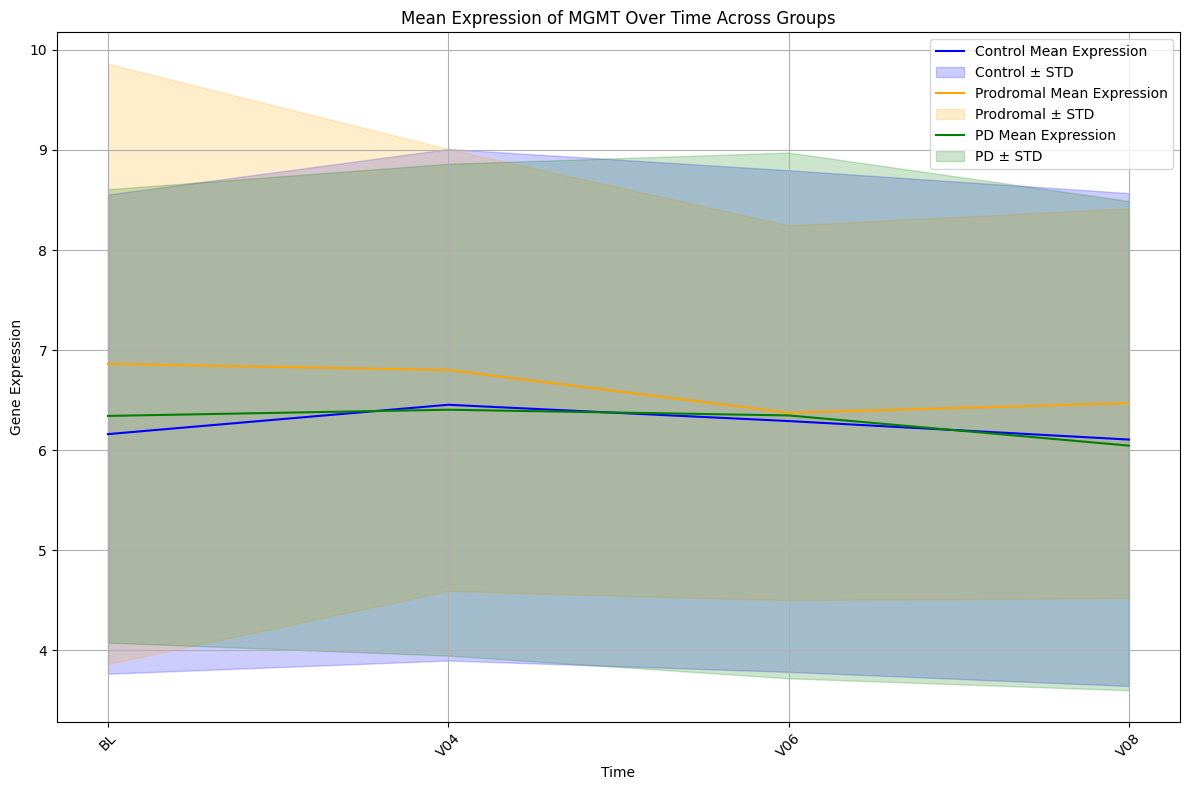

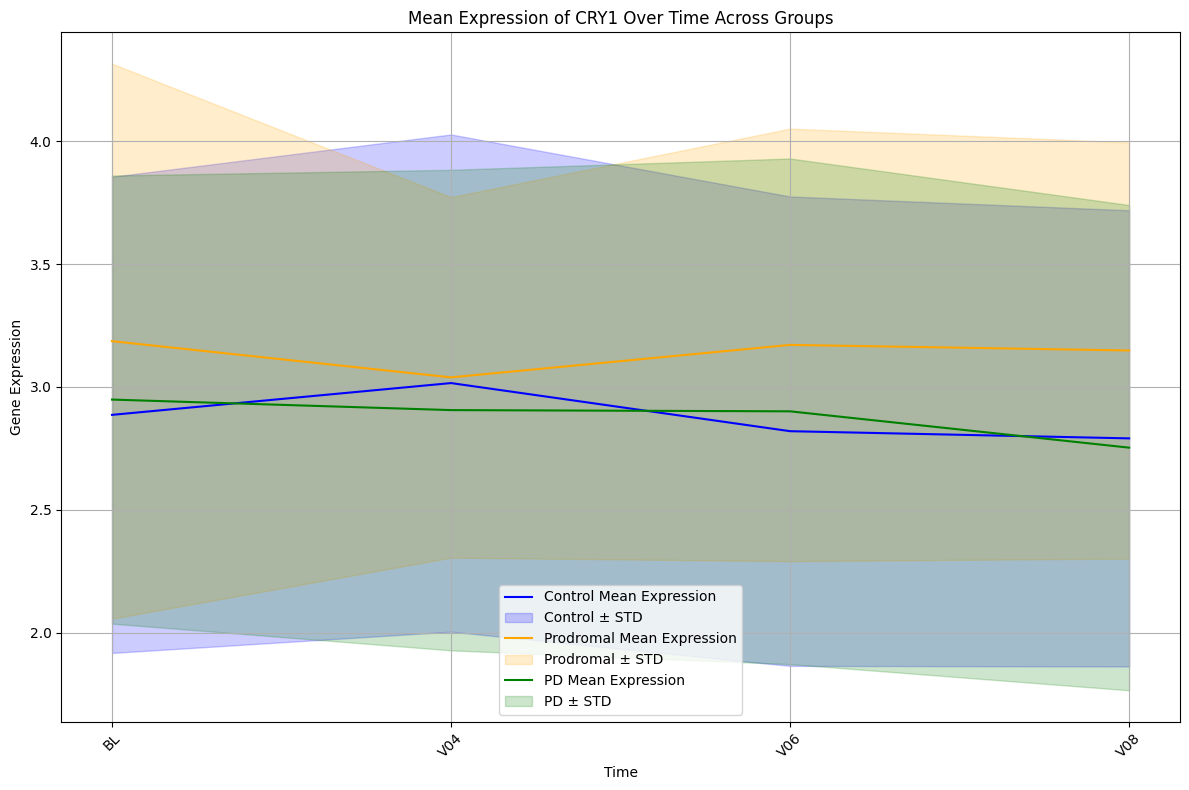

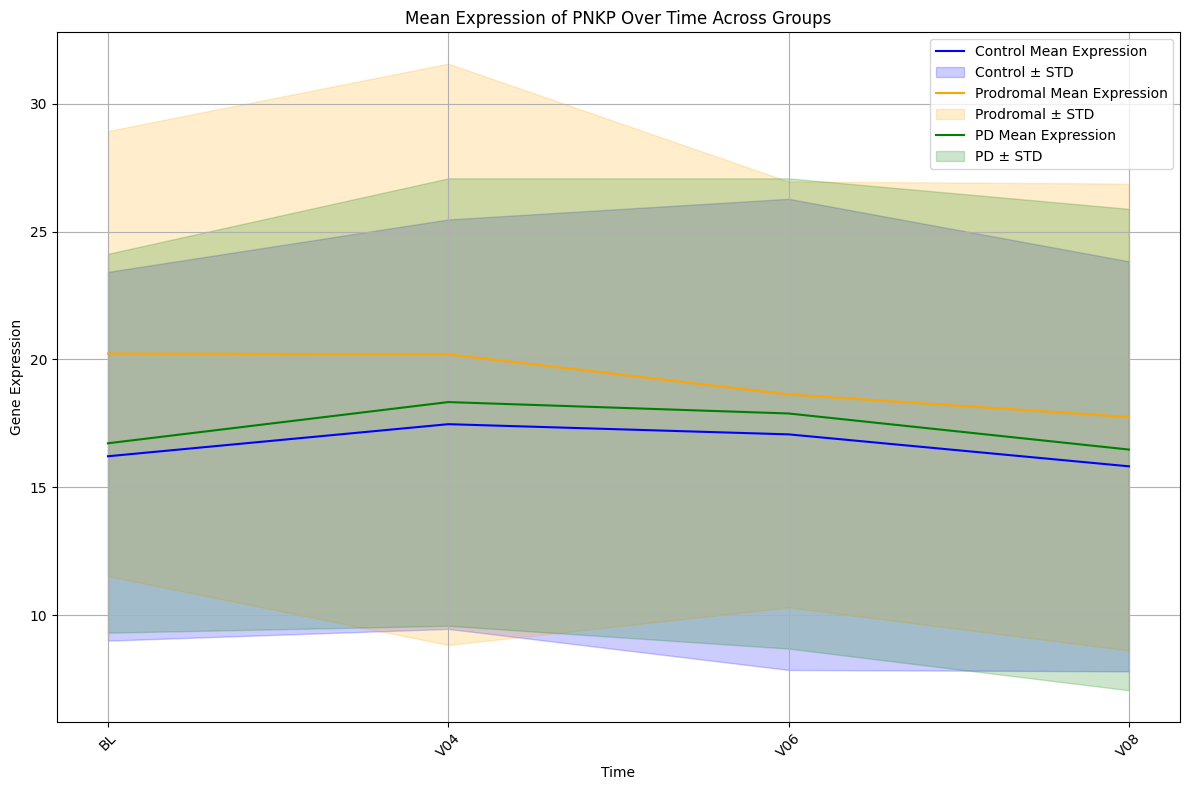

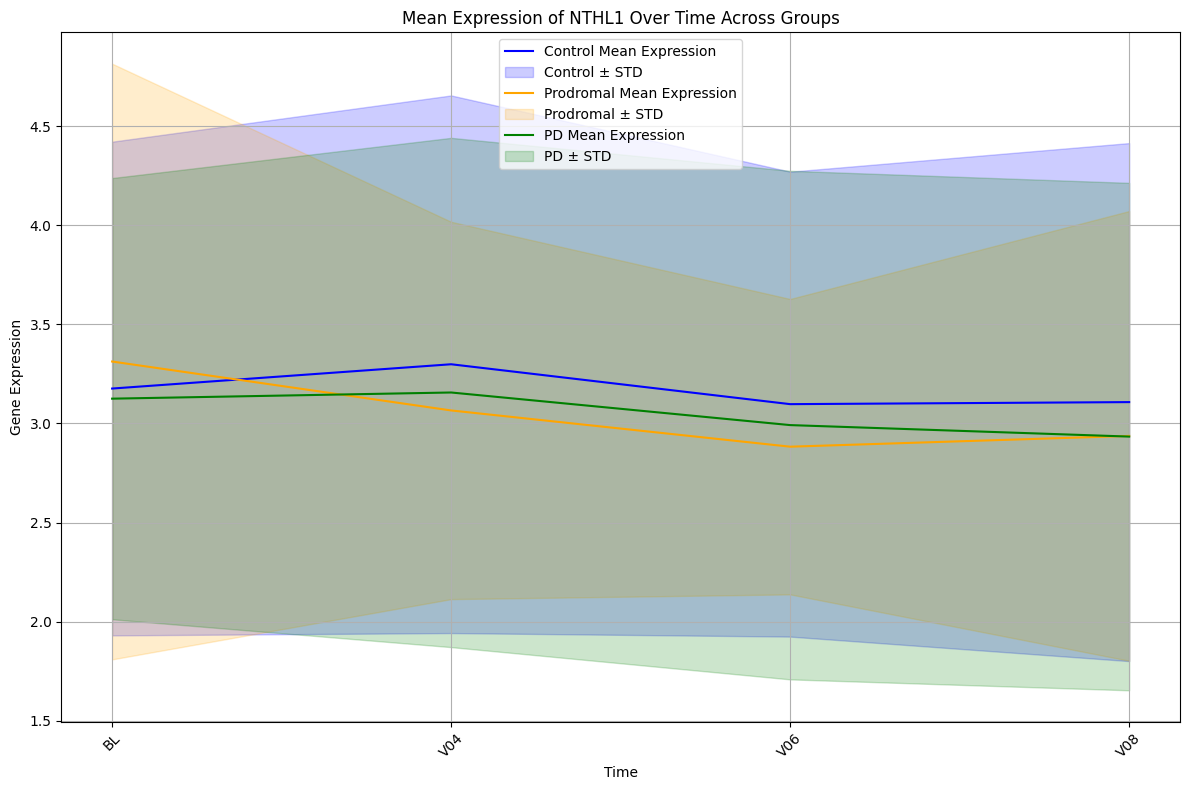

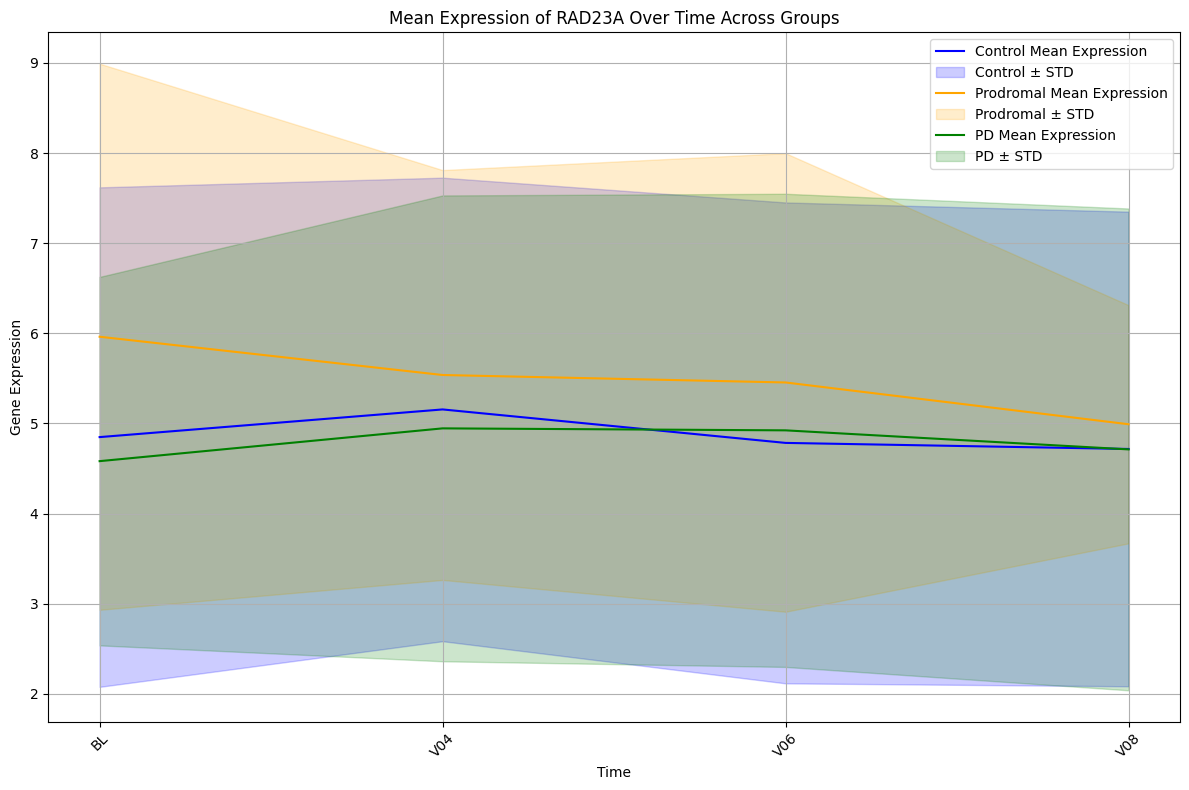

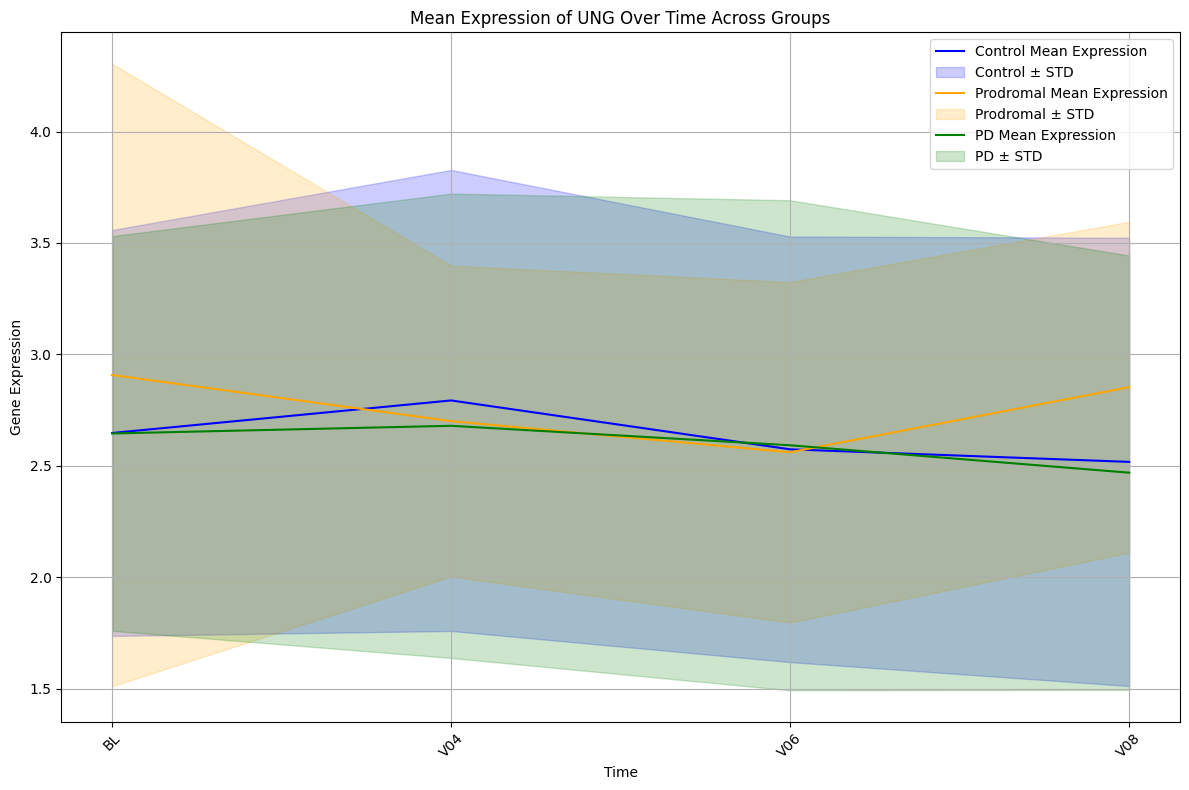

In [79]:
import matplotlib.pyplot as plt

# Loop through each gene
for gene in genes:
    # Create a new figure for each gene
    plt.figure(figsize=(12, 8))
    
    # Define a list to store the group data
    groups = ['Control', 'Prodromal', 'PD']
    colors = {'Control': 'blue', 'Prodromal': 'orange', 'PD': 'green'}
    
    for group in groups:
        # Filter and sort data by group
        group_tmp_data = tmp_data[tmp_data['New_Time_Point_2'].str.startswith(group)]
        group_tmp_data = group_tmp_data.sort_values(by='New_Time_Point')
        
        # Calculate mean and standard deviation
        mean_expression = group_tmp_data.groupby('New_Time_Point')[gene].mean()
        std_expression = group_tmp_data.groupby('New_Time_Point')[gene].std()
        
        # Extract clean time points
        index = [i.split('_')[1] for i in mean_expression.index]
        
        # Plot mean expression
        plt.plot(index, mean_expression, color=colors[group], label=f'{group} Mean Expression')
        
        # Fill the standard deviation area
        plt.fill_between(index,
                         mean_expression - std_expression,
                         mean_expression + std_expression,
                         color=colors[group], alpha=0.2, label=f'{group} ± STD')
    
    # Customize plot
    plt.xlabel('Time')
    plt.ylabel('Gene Expression')
    gene  = return_gene_name(gene)
    plt.title(f'Mean Expression of {gene} Over Time Across Groups')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()



In [81]:
compare_list = [ 'Prodromal_BL_Control_BL',  'Prodromal_V02_Control_V02' ,'Prodromal_V04_Control_V04','Prodromal_V06_Control_V06', 'Prodromal_V08_Control_V08']

In [82]:
compare_list

['Prodromal_BL_Control_BL',
 'Prodromal_V02_Control_V02',
 'Prodromal_V04_Control_V04',
 'Prodromal_V06_Control_V06',
 'Prodromal_V08_Control_V08']

In [83]:
FEATURE_IMPORTANCES_Prodromal_BL_Control_BL = dict()
FEATURE_IMPORTANCES_Prodromal_V02_Control_V02 = dict()
FEATURE_IMPORTANCES_Prodromal_V04_Control_V04 = dict()
FEATURE_IMPORTANCES_Prodromal_V06_Control_V06 = dict()
FEATURE_IMPORTANCES_Prodromal_V08_Control_V08 = dict()

for i in FEATURE_IMPORTANCES.keys():
    if 'Prodromal_BL_Control_BL' in i:
        FEATURE_IMPORTANCES_Prodromal_BL_Control_BL[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V02_Control_V02' in i:
        FEATURE_IMPORTANCES_Prodromal_V02_Control_V02[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V04_Control_V04' in i:
        FEATURE_IMPORTANCES_Prodromal_V04_Control_V04[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V06_Control_V06' in i:
        FEATURE_IMPORTANCES_Prodromal_V06_Control_V06[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V08_Control_V08' in i:
        FEATURE_IMPORTANCES_Prodromal_V08_Control_V08[i] = FEATURE_IMPORTANCES[i]
        
        

In [84]:
list(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys())[:10]

['Prodromal_BL_Control_BL_0',
 'Prodromal_BL_Control_BL_1',
 'Prodromal_BL_Control_BL_2',
 'Prodromal_BL_Control_BL_3',
 'Prodromal_BL_Control_BL_4',
 'Prodromal_BL_Control_BL_5',
 'Prodromal_BL_Control_BL_6',
 'Prodromal_BL_Control_BL_7',
 'Prodromal_BL_Control_BL_8',
 'Prodromal_BL_Control_BL_9']

In [85]:
genes_list = list(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL['Prodromal_BL_Control_BL_0'].keys())
genes_list[0:10]

['ENSG00000128951',
 'ENSG00000179262',
 'ENSG00000114026',
 'ENSG00000051341',
 'ENSG00000076248',
 'ENSG00000104884',
 'ENSG00000170430',
 'ENSG00000116288',
 'ENSG00000140521',
 'ENSG00000138346']

In [86]:
len(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys())

1000

In [87]:
AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys():
        s += FEATURE_IMPORTANCES_Prodromal_BL_Control_BL[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V02_Control_V02.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V02_Control_V02[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V02_Control_V02.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V04_Control_V04 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V04_Control_V04.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V04_Control_V04[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V04_Control_V04.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V04_Control_V04[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V06_Control_V06 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V06_Control_V06.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V06_Control_V06[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V06_Control_V06.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V06_Control_V06[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V08_Control_V08 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V08_Control_V08.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V08_Control_V08[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V08_Control_V08.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V08_Control_V08[i] = s
      

In [88]:
FEATURE_IMPORTANCES_MERGE = dict()
FEATURE_IMPORTANCES_MERGE['Prodromal_BL_Control_BL'] = AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL
FEATURE_IMPORTANCES_MERGE['Prodromal_V02_Control_V02'] = AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02
FEATURE_IMPORTANCES_MERGE['Prodromal_V04_Control_V04'] = AVG_FEATURE_IMPORTANCES_Prodromal_V04_Control_V04
FEATURE_IMPORTANCES_MERGE['Prodromal_V06_Control_V06'] = AVG_FEATURE_IMPORTANCES_Prodromal_V06_Control_V06
FEATURE_IMPORTANCES_MERGE['Prodromal_V08_Control_V08'] = AVG_FEATURE_IMPORTANCES_Prodromal_V08_Control_V08


In [89]:
ranking_of_features = []
for i in compare_list:


    df = pd.DataFrame(FEATURE_IMPORTANCES_MERGE[i].items())
    df[2] = np.abs(df[1])
    df = df.sort_values(by = 2, ascending=False)
    print(df)
    ranking_of_features.append(df[0].tolist())


                  0         1         2
3   ENSG00000051341 -1.078108  1.078108
16  ENSG00000160957 -0.789423  0.789423
20  ENSG00000132781  0.757437  0.757437
4   ENSG00000076248  0.614830  0.614830
25  ENSG00000067369 -0.431406  0.431406
13  ENSG00000065057  0.392391  0.392391
19  ENSG00000012048 -0.383994  0.383994
2   ENSG00000114026  0.351069  0.351069
23  ENSG00000100601  0.343831  0.343831
24  ENSG00000103152  0.342192  0.342192
17  ENSG00000164306 -0.342013  0.342013
26  ENSG00000154328  0.320787  0.320787
5   ENSG00000104884  0.306621  0.306621
11  ENSG00000225830  0.302471  0.302471
6   ENSG00000170430  0.246081  0.246081
15  ENSG00000008405 -0.225036  0.225036
18  ENSG00000005156 -0.184316  0.184316
22  ENSG00000140398 -0.177443  0.177443
1   ENSG00000179262 -0.102622  0.102622
9   ENSG00000138346 -0.096577  0.096577
21  ENSG00000100823 -0.084309  0.084309
12  ENSG00000039650 -0.079315  0.079315
10  ENSG00000070501 -0.047166  0.047166
7   ENSG00000116288 -0.043238  0.043238


In [90]:
ranking_of_features[4][0:10]

['ENSG00000070501',
 'ENSG00000164306',
 'ENSG00000039650',
 'ENSG00000225830',
 'ENSG00000116288',
 'ENSG00000132781',
 'ENSG00000140398',
 'ENSG00000012048',
 'ENSG00000128951',
 'ENSG00000140521']

In [91]:
gene_lists = ranking_of_features

In [92]:
ranking_of_features[4][0:10]

['ENSG00000070501',
 'ENSG00000164306',
 'ENSG00000039650',
 'ENSG00000225830',
 'ENSG00000116288',
 'ENSG00000132781',
 'ENSG00000140398',
 'ENSG00000012048',
 'ENSG00000128951',
 'ENSG00000140521']

In [93]:
gene_lists = ranking_of_features

In [94]:
gene_indices = {}

# Loop through each list and index each gene
for list_idx, gene_list in enumerate(gene_lists):
    for gene_idx, gene in enumerate(gene_list):
        # Initialize the gene's entry if not present
        if gene not in gene_indices:
            gene_indices[gene] = [-1] * len(gene_lists)  # Default -1 for lists where gene is absent
        # Update the index of the gene in the current list
        gene_indices[gene][list_idx] = gene_idx

# Display results
for gene, indices in gene_indices.items():
    print(f"{gene}: {indices}")

ENSG00000051341: [0, 5, 14, 1, 20]
ENSG00000160957: [1, 10, 15, 17, 26]
ENSG00000132781: [2, 8, 17, 9, 5]
ENSG00000076248: [3, 3, 16, 21, 23]
ENSG00000067369: [4, 23, 13, 22, 10]
ENSG00000065057: [5, 22, 2, 3, 16]
ENSG00000012048: [6, 9, 6, 13, 7]
ENSG00000114026: [7, 2, 11, 4, 21]
ENSG00000100601: [8, 0, 12, 6, 19]
ENSG00000103152: [9, 13, 5, 11, 15]
ENSG00000164306: [10, 21, 9, 8, 1]
ENSG00000154328: [11, 7, 0, 2, 17]
ENSG00000104884: [12, 1, 20, 10, 24]
ENSG00000225830: [13, 15, 4, 7, 3]
ENSG00000170430: [14, 12, 18, 23, 14]
ENSG00000008405: [15, 14, 3, 19, 22]
ENSG00000005156: [16, 6, 1, 14, 11]
ENSG00000140398: [17, 11, 10, 16, 6]
ENSG00000179262: [18, 18, 7, 5, 13]
ENSG00000138346: [19, 4, 8, 0, 12]
ENSG00000100823: [20, 16, 21, 15, 25]
ENSG00000039650: [21, 17, 22, 24, 2]
ENSG00000070501: [22, 24, 24, 12, 0]
ENSG00000116288: [23, 19, 19, 20, 4]
ENSG00000140521: [24, 25, 23, 18, 9]
ENSG00000128951: [25, 20, 25, 26, 8]
ENSG00000065978: [26, 26, 26, 25, 18]


In [95]:
ranking_df = pd.DataFrame(gene_indices).T
ranking_df.columns = ['BL','V02','V04','V06','V08']


In [96]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return ensembleid

In [97]:
tmp_df = ranking_df.reset_index()
ranking_df['Gene_Name'] =tmp_df['index'].apply(return_gene_name).tolist()

In [98]:
ranking_df[ranking_df.Gene_Name.isna()]

Empty DataFrame
Columns: [BL, V02, V04, V06, V08, Gene_Name]
Index: []

In [99]:
ranking_df.set_index('Gene_Name',inplace=True)
ranking_df

BL  V02  V04  V06  V08
Gene_Name                        
POLQ        0    5   14    1   20
RECQL4      1   10   15   17   26
MUTYH       2    8   17    9    5
UNG         3    3   16   21   23
TP53BP1     4   23   13   22   10
NTHL1       5   22    2    3   16
BRCA1       6    9    6   13    7
OGG1        7    2   11    4   21
ALKBH1      8    0   12    6   19
MPG         9   13    5   11   15
PRIMPOL    10   21    9    8    1
NEIL2      11    7    0    2   17
ERCC2      12    1   20   10   24
ERCC6      13   15    4    7    3
MGMT       14   12   18   23   14
CRY1       15   14    3   19   22
LIG3       16    6    1   14   11
NEIL1      17   11   10   16    6
RAD23A     18   18    7    5   13
DNA2       19    4    8    0   12
APEX1      20   16   21   15   25
PNKP       21   17   22   24    2
POLB       22   24   24   12    0
PARK7      23   19   19   20    4
POLG       24   25   23   18    9
DUT        25   20   25   26    8
YBX1       26   26   26   25   18

In [102]:
ranking_df.to_csv('ranking_df/Mitochondria_Genes_control_to_prodromal_ranking_df.csv', index=True)
ranking_df.head()

BL  V02  V04  V06  V08
Gene_Name                        
POLQ        0    5   14    1   20
RECQL4      1   10   15   17   26
MUTYH       2    8   17    9    5
UNG         3    3   16   21   23
TP53BP1     4   23   13   22   10

In [103]:
subset_dict = {key: gene_indices[key] for key in ranking_of_features[4] if key in gene_indices}

print(subset_dict)

{'ENSG00000070501': [22, 24, 24, 12, 0], 'ENSG00000164306': [10, 21, 9, 8, 1], 'ENSG00000039650': [21, 17, 22, 24, 2], 'ENSG00000225830': [13, 15, 4, 7, 3], 'ENSG00000116288': [23, 19, 19, 20, 4], 'ENSG00000132781': [2, 8, 17, 9, 5], 'ENSG00000140398': [17, 11, 10, 16, 6], 'ENSG00000012048': [6, 9, 6, 13, 7], 'ENSG00000128951': [25, 20, 25, 26, 8], 'ENSG00000140521': [24, 25, 23, 18, 9], 'ENSG00000067369': [4, 23, 13, 22, 10], 'ENSG00000005156': [16, 6, 1, 14, 11], 'ENSG00000138346': [19, 4, 8, 0, 12], 'ENSG00000179262': [18, 18, 7, 5, 13], 'ENSG00000170430': [14, 12, 18, 23, 14], 'ENSG00000103152': [9, 13, 5, 11, 15], 'ENSG00000065057': [5, 22, 2, 3, 16], 'ENSG00000154328': [11, 7, 0, 2, 17], 'ENSG00000065978': [26, 26, 26, 25, 18], 'ENSG00000100601': [8, 0, 12, 6, 19], 'ENSG00000051341': [0, 5, 14, 1, 20], 'ENSG00000114026': [7, 2, 11, 4, 21], 'ENSG00000008405': [15, 14, 3, 19, 22], 'ENSG00000076248': [3, 3, 16, 21, 23], 'ENSG00000104884': [12, 1, 20, 10, 24], 'ENSG00000100823': [20,

In [104]:
gene_ranks = subset_dict

In [105]:
# Original dictionary with gene rankings
'''gene_ranks = subset_dict


# Flatten the list to find the min and max values across all rankings
all_ranks = [rank for ranks in gene_ranks.values() for rank in ranks]
min_rank, max_rank = min(all_ranks), max(all_ranks)

# Normalize each ranking
normalized_gene_ranks = {
    gene: [(rank - min_rank) / (max_rank - min_rank) * 10 for rank in ranks]
    for gene, ranks in gene_ranks.items()
}

# Display the normalized rankings
for gene, normalized_ranks in normalized_gene_ranks.items():
    print(f"{gene}: {normalized_ranks}")
'''

'gene_ranks = subset_dict\n\n\n# Flatten the list to find the min and max values across all rankings\nall_ranks = [rank for ranks in gene_ranks.values() for rank in ranks]\nmin_rank, max_rank = min(all_ranks), max(all_ranks)\n\n# Normalize each ranking\nnormalized_gene_ranks = {\n    gene: [(rank - min_rank) / (max_rank - min_rank) * 10 for rank in ranks]\n    for gene, ranks in gene_ranks.items()\n}\n\n# Display the normalized rankings\nfor gene, normalized_ranks in normalized_gene_ranks.items():\n    print(f"{gene}: {normalized_ranks}")\n'

In [106]:
df = pd.DataFrame(gene_ranks).T
df

0   1   2   3   4
ENSG00000070501  22  24  24  12   0
ENSG00000164306  10  21   9   8   1
ENSG00000039650  21  17  22  24   2
ENSG00000225830  13  15   4   7   3
ENSG00000116288  23  19  19  20   4
ENSG00000132781   2   8  17   9   5
ENSG00000140398  17  11  10  16   6
ENSG00000012048   6   9   6  13   7
ENSG00000128951  25  20  25  26   8
ENSG00000140521  24  25  23  18   9
ENSG00000067369   4  23  13  22  10
ENSG00000005156  16   6   1  14  11
ENSG00000138346  19   4   8   0  12
ENSG00000179262  18  18   7   5  13
ENSG00000170430  14  12  18  23  14
ENSG00000103152   9  13   5  11  15
ENSG00000065057   5  22   2   3  16
ENSG00000154328  11   7   0   2  17
ENSG00000065978  26  26  26  25  18
ENSG00000100601   8   0  12   6  19
ENSG00000051341   0   5  14   1  20
ENSG00000114026   7   2  11   4  21
ENSG00000008405  15  14   3  19  22
ENSG00000076248   3   3  16  21  23
ENSG00000104884  12   1  20  10  24
ENSG00000100823  20  16  21  15  25
ENSG00000160957   1  10  15  17  26

In [107]:
df

0   1   2   3   4
ENSG00000070501  22  24  24  12   0
ENSG00000164306  10  21   9   8   1
ENSG00000039650  21  17  22  24   2
ENSG00000225830  13  15   4   7   3
ENSG00000116288  23  19  19  20   4
ENSG00000132781   2   8  17   9   5
ENSG00000140398  17  11  10  16   6
ENSG00000012048   6   9   6  13   7
ENSG00000128951  25  20  25  26   8
ENSG00000140521  24  25  23  18   9
ENSG00000067369   4  23  13  22  10
ENSG00000005156  16   6   1  14  11
ENSG00000138346  19   4   8   0  12
ENSG00000179262  18  18   7   5  13
ENSG00000170430  14  12  18  23  14
ENSG00000103152   9  13   5  11  15
ENSG00000065057   5  22   2   3  16
ENSG00000154328  11   7   0   2  17
ENSG00000065978  26  26  26  25  18
ENSG00000100601   8   0  12   6  19
ENSG00000051341   0   5  14   1  20
ENSG00000114026   7   2  11   4  21
ENSG00000008405  15  14   3  19  22
ENSG00000076248   3   3  16  21  23
ENSG00000104884  12   1  20  10  24
ENSG00000100823  20  16  21  15  25
ENSG00000160957   1  10  15  17  26

In [108]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return ensembleid

tmp_df = df.reset_index()
df['Gene_Name'] =tmp_df['index'].apply(return_gene_name).tolist()
df.set_index('Gene_Name',inplace=True)

In [109]:
ranked_df = df.rank(axis=0, method='min').astype(int)

print(ranked_df)

            0   1   2   3   4
Gene_Name                    
POLB       23  25  25  13   1
PRIMPOL    11  22  10   9   2
PNKP       22  18  23  25   3
ERCC6      14  16   5   8   4
PARK7      24  20  20  21   5
MUTYH       3   9  18  10   6
NEIL1      18  12  11  17   7
BRCA1       7  10   7  14   8
DUT        26  21  26  27   9
POLG       25  26  24  19  10
TP53BP1     5  24  14  23  11
LIG3       17   7   2  15  12
DNA2       20   5   9   1  13
RAD23A     19  19   8   6  14
MGMT       15  13  19  24  15
MPG        10  14   6  12  16
NTHL1       6  23   3   4  17
NEIL2      12   8   1   3  18
YBX1       27  27  27  26  19
ALKBH1      9   1  13   7  20
POLQ        1   6  15   2  21
OGG1        8   3  12   5  22
CRY1       16  15   4  20  23
UNG         4   4  17  22  24
ERCC2      13   2  21  11  25
APEX1      21  17  22  16  26
RECQL4      2  11  16  18  27


In [110]:
reversed_ranks = ranked_df .max() - ranked_df  + 1

print(reversed_ranks)

            0   1   2   3   4
Gene_Name                    
POLB        5   3   3  15  27
PRIMPOL    17   6  18  19  26
PNKP        6  10   5   3  25
ERCC6      14  12  23  20  24
PARK7       4   8   8   7  23
MUTYH      25  19  10  18  22
NEIL1      10  16  17  11  21
BRCA1      21  18  21  14  20
DUT         2   7   2   1  19
POLG        3   2   4   9  18
TP53BP1    23   4  14   5  17
LIG3       11  21  26  13  16
DNA2        8  23  19  27  15
RAD23A      9   9  20  22  14
MGMT       13  15   9   4  13
MPG        18  14  22  16  12
NTHL1      22   5  25  24  11
NEIL2      16  20  27  25  10
YBX1        1   1   1   2   9
ALKBH1     19  27  15  21   8
POLQ       27  22  13  26   7
OGG1       20  25  16  23   6
CRY1       12  13  24   8   5
UNG        24  24  11   6   4
ERCC2      15  26   7  17   3
APEX1       7  11   6  12   2
RECQL4     26  17  12  10   1


In [111]:
rank_dict = reversed_ranks.T.to_dict(orient='list')
rank_dict

{'POLB': [5, 3, 3, 15, 27],
 'PRIMPOL': [17, 6, 18, 19, 26],
 'PNKP': [6, 10, 5, 3, 25],
 'ERCC6': [14, 12, 23, 20, 24],
 'PARK7': [4, 8, 8, 7, 23],
 'MUTYH': [25, 19, 10, 18, 22],
 'NEIL1': [10, 16, 17, 11, 21],
 'BRCA1': [21, 18, 21, 14, 20],
 'DUT': [2, 7, 2, 1, 19],
 'POLG': [3, 2, 4, 9, 18],
 'TP53BP1': [23, 4, 14, 5, 17],
 'LIG3': [11, 21, 26, 13, 16],
 'DNA2': [8, 23, 19, 27, 15],
 'RAD23A': [9, 9, 20, 22, 14],
 'MGMT': [13, 15, 9, 4, 13],
 'MPG': [18, 14, 22, 16, 12],
 'NTHL1': [22, 5, 25, 24, 11],
 'NEIL2': [16, 20, 27, 25, 10],
 'YBX1': [1, 1, 1, 2, 9],
 'ALKBH1': [19, 27, 15, 21, 8],
 'POLQ': [27, 22, 13, 26, 7],
 'OGG1': [20, 25, 16, 23, 6],
 'CRY1': [12, 13, 24, 8, 5],
 'UNG': [24, 24, 11, 6, 4],
 'ERCC2': [15, 26, 7, 17, 3],
 'APEX1': [7, 11, 6, 12, 2],
 'RECQL4': [26, 17, 12, 10, 1]}

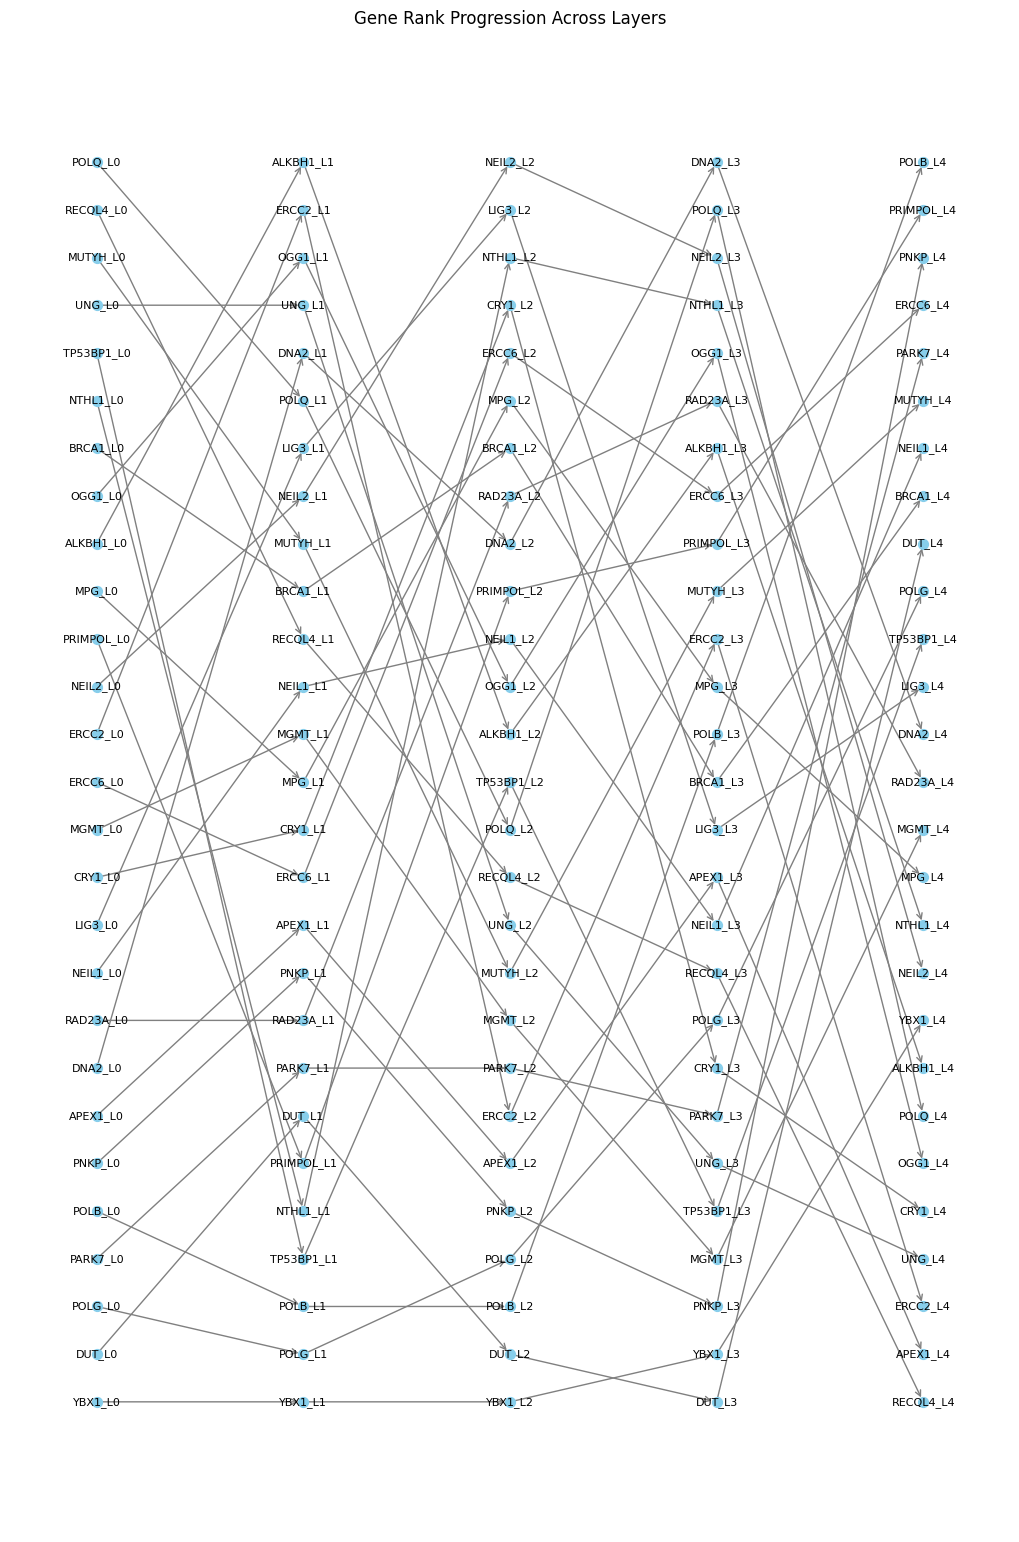

In [112]:
import matplotlib.pyplot as plt
import networkx as nx

# The rank positions for each gene across four layers
gene_ranks = rank_dict

G = nx.DiGraph()

# Number of layers
num_layers = len(next(iter(gene_ranks.values())))

# Add nodes and edges for each gene across the layers
for gene, ranks in gene_ranks.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(10, 15))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowstyle='->', arrowsize=10, node_color="skyblue", edge_color="gray")

plt.title("Gene Rank Progression Across Layers")
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower
plt.show()

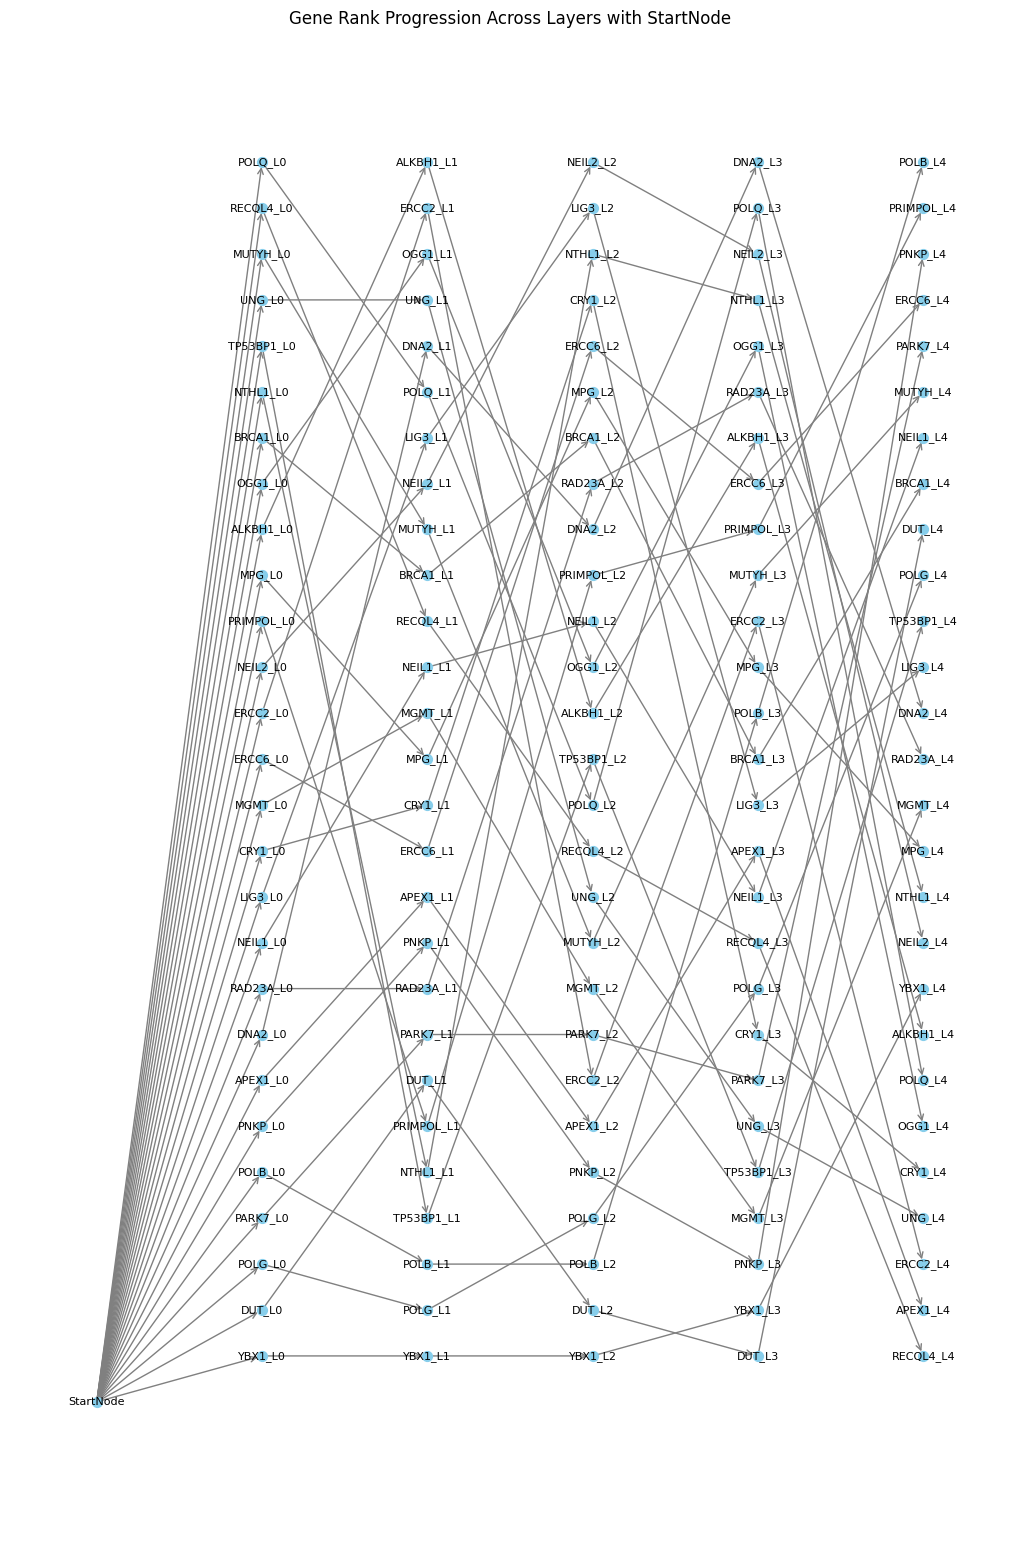

In [113]:
import matplotlib.pyplot as plt
import networkx as nx

# Example rank dictionary (you should replace this with your actual rank_dict)

# Create the directed graph
G = nx.DiGraph()

# Number of layers (based on the length of the rank list)
num_layers = len(next(iter(rank_dict.values())))

# Add the start node before the first layer
start_node = "StartNode"
G.add_node(start_node, layer=-1, rank=0)  # Layer -1 to indicate it's before the first layer

# Add nodes and edges for each gene across the layers
for gene, ranks in rank_dict.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)
    
    # Add edges from the start node to the first layer nodes
    first_layer_node = f"{gene}_L0"
    G.add_edge(start_node, first_layer_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(10, 15))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowstyle='->', arrowsize=10, node_color="skyblue", edge_color="gray")

# Title and labels
plt.title("Gene Rank Progression Across Layers with StartNode")
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower
plt.savefig("gene_rank_progression.svg", format="svg")
plt.show()


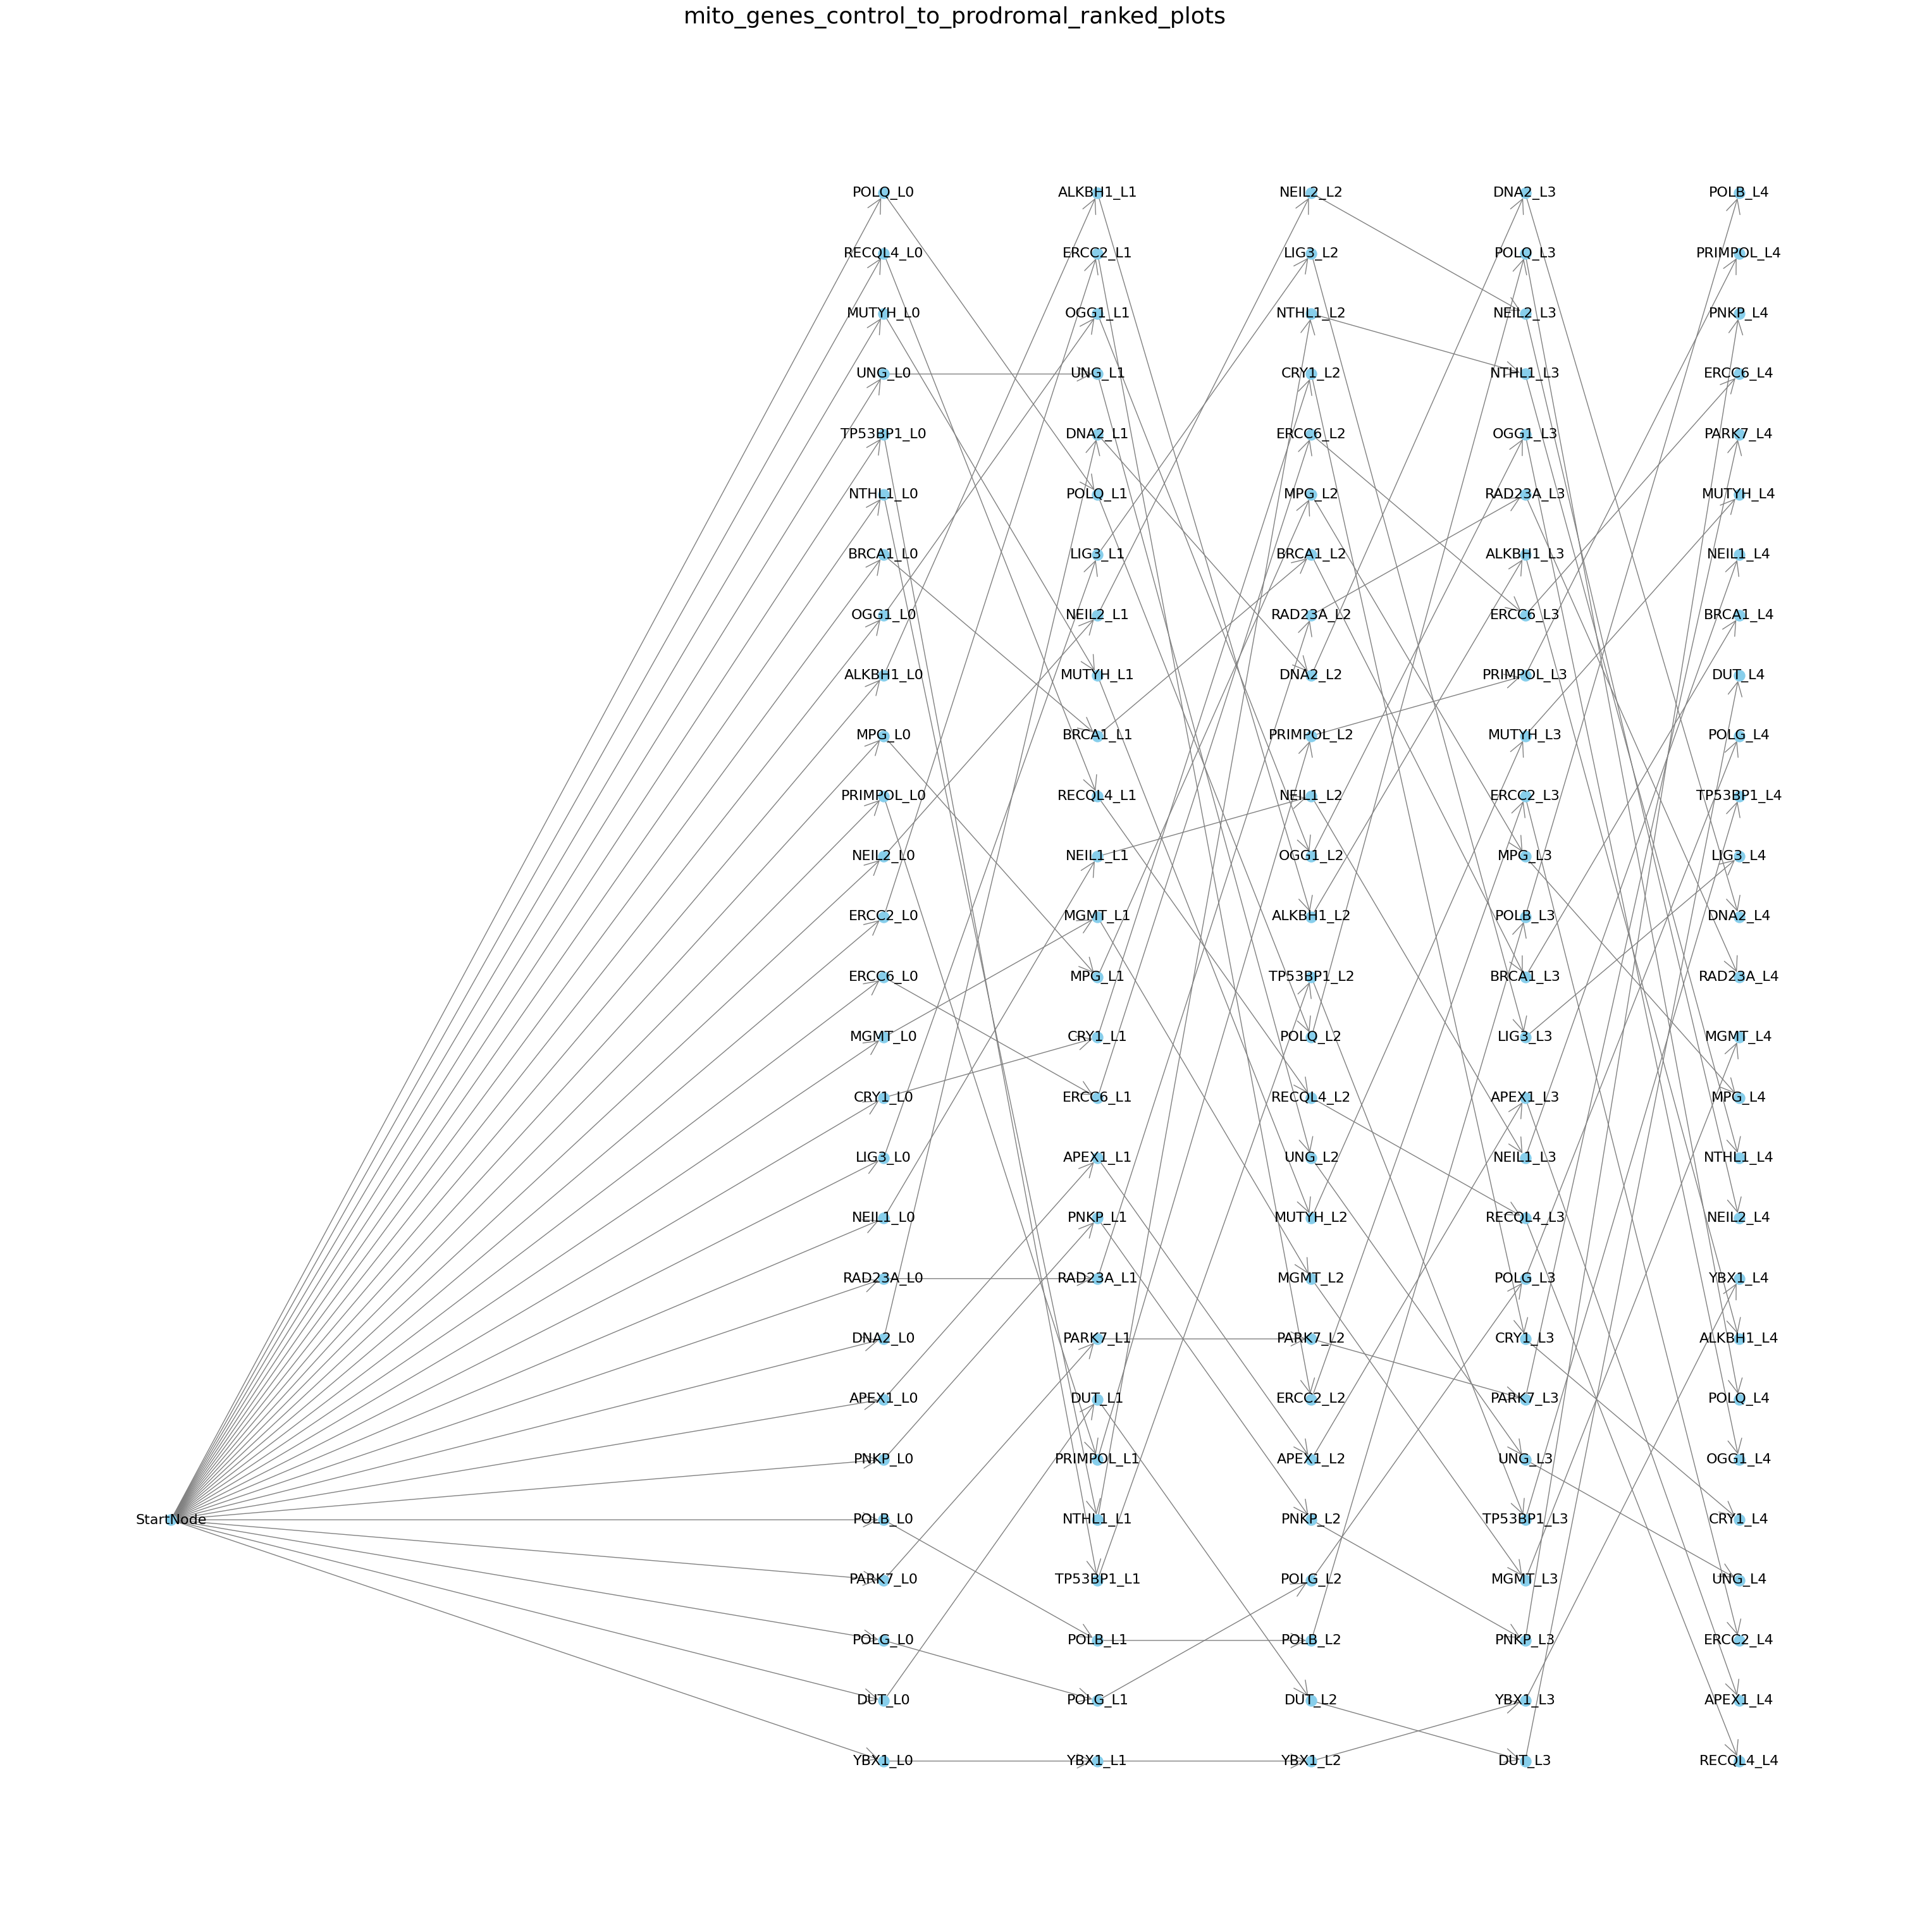

In [115]:
import matplotlib.pyplot as plt
import networkx as nx

# Example rank dictionary (you should replace this with your actual rank_dict)



# Create the directed graph
G = nx.DiGraph()

# Number of layers (based on the length of the rank list)
num_layers = len(next(iter(rank_dict.values())))

# Add the start node before the first layer
start_node = "StartNode"
G.add_node(start_node, layer=-1, rank=0)  # Layer -1 to indicate it's before the first layer

# Add nodes and edges for each gene across the layers
for gene, ranks in rank_dict.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)
    
    # Add edges from the start node to the first layer nodes
    first_layer_node = f"{gene}_L0"
    G.add_edge(start_node, first_layer_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

# Set the position of the StartNode to be at the mid-left of the first layer
start_node_x_pos = -5 # Fixed position on the left
start_node_y_pos = -1.5  # Middle of first layer vertically

# Position the nodes
for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    
    if layer == -1:
        # Place the StartNode on the mid-left of the first layer
        pos[node] = (start_node_x_pos, start_node_y_pos)
    else:
        # Place other nodes based on their layer and rank
        pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(30, 30))
nx.draw(G, pos, with_labels=True, node_size=150, font_size=16, arrowstyle='->', arrowsize=40, node_color="skyblue", edge_color="gray")

# Title and labels
plt.title("mito_genes_control_to_prodromal_ranked_plots", fontsize=26)
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower

# Save the plot as an SVG file
plt.savefig("gene_rank_progression_with_start_node_left.svg", format="svg")
plt.savefig("gene_rank_progression_with_start_node_left.png", format="png")
# Show the plot
#plt.savefig(f"save_mito_genes_plots/mito_control_to_prodromal_ranked_genes_plots.png", dpi=300)
plt.show()


In [116]:
!mkdir -p feature_importance_weights/mitochondria_genes//control_vs_prodromal

def return_value(i):

    l = [AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL[i],AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02[i],
         AVG_FEATURE_IMPORTANCES_Prodromal_V04_Control_V04[i],
    AVG_FEATURE_IMPORTANCES_Prodromal_V06_Control_V06[i],AVG_FEATURE_IMPORTANCES_Prodromal_V08_Control_V08[i]]
    return l


li = []
genes = []
for i in AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys():
    
    li.append(return_value(i))
    genes.append(i)

df = pd.DataFrame(li)
df['genes'] = genes
df = df.set_index('genes')
df.columns = ['BL','V02','V04','V06','V08']
df['Gene_Name'] =df.reset_index()['genes'].apply(return_gene_name).tolist()
df = df.set_index('Gene_Name')
df.to_csv(f'feature_importance_weights/mitochondria_genes//control_vs_prodromal/control_vs_prodromal.csv',index = True)
df


BL       V02       V04       V06       V08
Gene_Name                                                  
DUT        0.011975  0.078847 -0.021443 -0.011100  0.170875
RAD23A    -0.102622 -0.085318  0.632533  0.444126  0.124036
OGG1       0.351069  0.932036 -0.380518  0.503057 -0.062953
POLQ      -1.078108 -0.580127 -0.272123 -0.849329 -0.071135
UNG        0.614830  0.780439  0.165369 -0.065609  0.036413
ERCC2      0.306621  1.181864  0.131222  0.245192  0.025571
MGMT       0.246081 -0.343890 -0.157248  0.051131  0.123082
PARK7     -0.043238 -0.078911 -0.154389  0.081288  0.199598
POLG      -0.022028 -0.033340 -0.079584 -0.102767 -0.165196
DNA2      -0.096577 -0.593732  0.540892  1.015017  0.126307
POLB      -0.047166 -0.044747 -0.034687 -0.144562 -0.592353
ERCC6      0.302471  0.212226  0.758840  0.394879  0.203501
PNKP      -0.079315  0.139122  0.117506  0.031029  0.286832
NTHL1      0.392391 -0.073855  0.829418  0.729308  0.119772
YBX1      -0.006981  0.000069 -0.021045 -0.020136 -0.111411
CRY1      -0.225036 -0.242297  0.782098  0.090397  0.053385
RECQL4    -0.789423 -0.431163  0.177756  0.106299 -0.010370
PRIMPOL   -0.342013 -0.078472 -0.490409 -0.302589 -0.291099
LIG3      -0.184316 -0.546404 -1.044630 -0.133492 -0.156289
BRCA1     -0.383994  0.456056 -0.641652 -0.139882 -0.184984
MUTYH      0.757437 -0.517481  0.161209  0.254293 -0.186397
APEX1     -0.084309  0.177406  0.117752 -0.116835 -0.011433
NEIL1     -0.177443 -0.362960 -0.440776  0.111706 -0.186112
ALKBH1     0.343831  1.314829 -0.343193 -0.429443 -0.077305
MPG        0.342192 -0.341561  0.665670 -0.181841 -0.121756
TP53BP1   -0.431406 -0.059407  0.291116 -0.060928 -0.160830
NEIL2      0.320787  0.518144  1.211146  0.828132  0.119250

In [ ]:
+